In [1]:
import pandas as pd
import csv

import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
sns.set_style('darkgrid')
sns.set_context('paper')

In [47]:
keys = results_sum[0].keys()
with open('IDN_Res_JAKARTA_Summary.csv', 'w', newline='')  as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(results_sum)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os

In [6]:
# Step 1: Parse all CSV files in a folder and append them into a single dataframe

folder_path = os.getcwd()  # Replace with the path to your folder
all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

df_list = []

for file in all_files:
    file_path = os.path.join(folder_path, file)
    temp_df = pd.read_csv(file_path)
    df_list.append(temp_df)

# Concatenate all dataframes in the list into a single dataframe
df = pd.concat(df_list, ignore_index=True)

# Step 2: Melt the dataframe



In [16]:
# Assuming you want to melt based on a column named 'id_column' and transform 'variable_column' into multiple columns
pivot_df = df.pivot_table(index=['location', 'orientation', 'ac_scenario', 'case_name'], 
                          columns='end_use', values='Electricity [kWh]', aggfunc='sum').reset_index()
pivot_df['hvac'] = pivot_df['Cooling'] + pivot_df['Heating'] + pivot_df['Fans']

In [18]:
pivot_df.to_csv('IDN_Res_Summary.csv', index=False)

In [29]:
df2 = pd.DataFrame()
for location in pivot_df['location'].unique():
    for orientation in pivot_df['orientation'].unique():
        for ac_scenario in pivot_df['ac_scenario'].unique():
            sub_df = pivot_df[(pivot_df['location']==location) & (pivot_df['orientation']==orientation) & (pivot_df['ac_scenario']==ac_scenario)]
            sub_df = sub_df.pivot(index=['location','orientation','ac_scenario'], 
                                  columns='case_name', values='hvac').reset_index()
            # Calculate the savings for each scenario compared to the baseline
            for column in sub_df.columns[3::]:
                if column != 'Baseline':
                    sub_df[f'{column}_savings_kwh'] = sub_df['Baseline'] - sub_df[column]
                    sub_df[f'{column}_savings_pct'] = sub_df[f'{column}_savings_kwh']/sub_df['Baseline']
                else:
                    sub_df[f'Baseline_savings_kwh'] = 0
                    sub_df[f'Baseline_savings_pct'] = 0
            df2 = pd.concat([df2, sub_df], ignore_index=True)
df2.to_csv('IDN_Res_Savings.csv', index=False)
            

In [43]:
# List of strings to search for
search_strings = ['Baseline', 'kwh', 'pct']

# Find columns that contain any of the search strings
matching_columns = [col for col in df2.columns if col.split('_')[-1] in search_strings]

# Melt the dataframe
melted_df = pd.melt(df2, id_vars=['location','orientation','ac_scenario'], 
                    value_vars=matching_columns, 
                    var_name='case_name', value_name='value')

In [ ]:
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

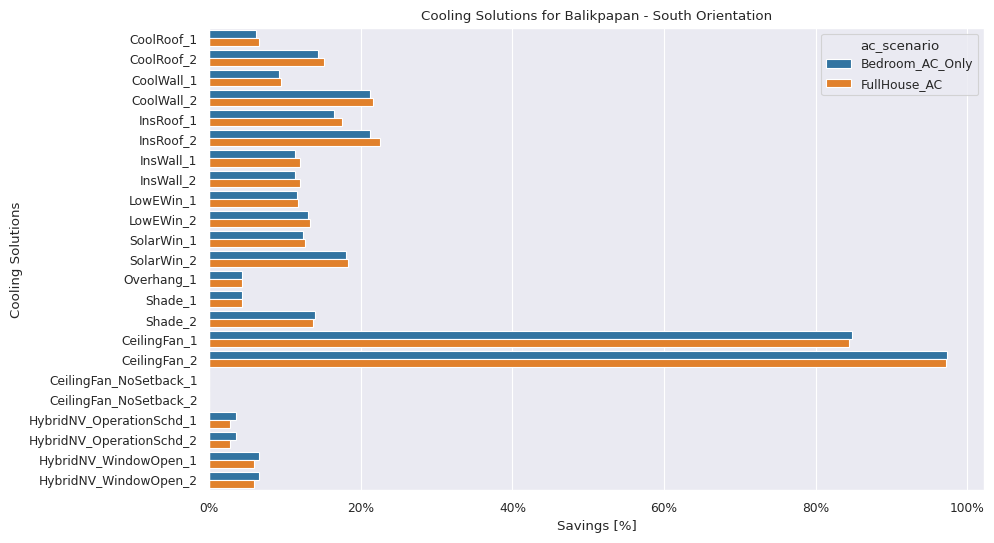

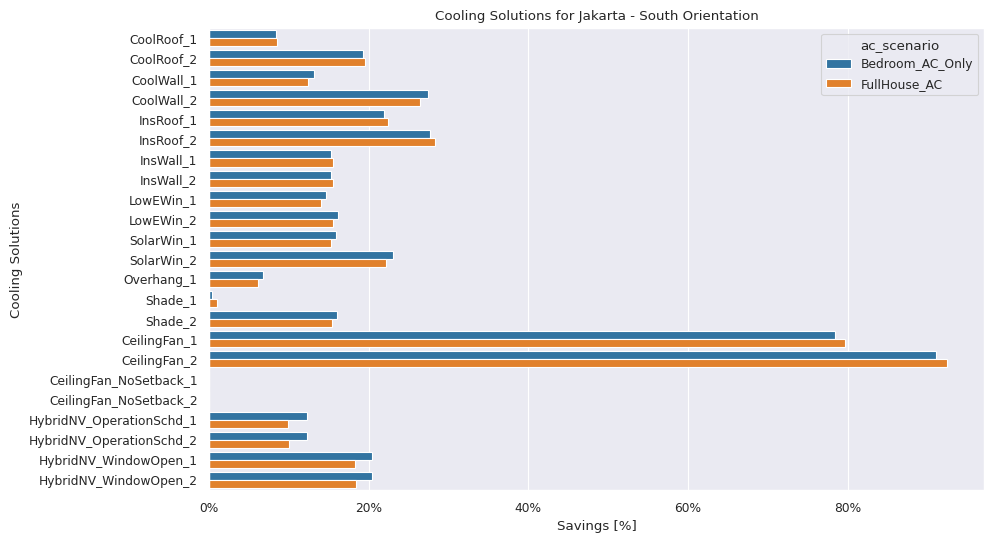

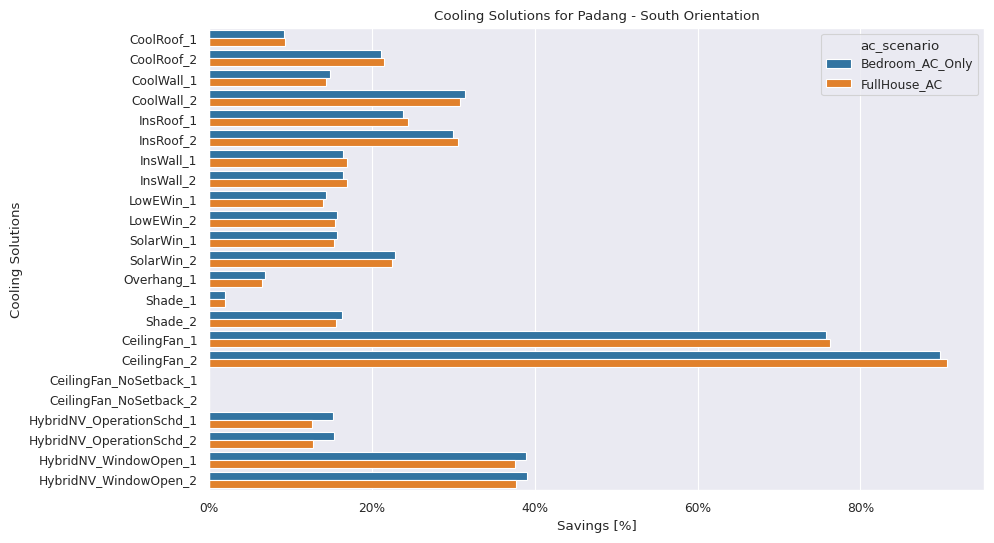

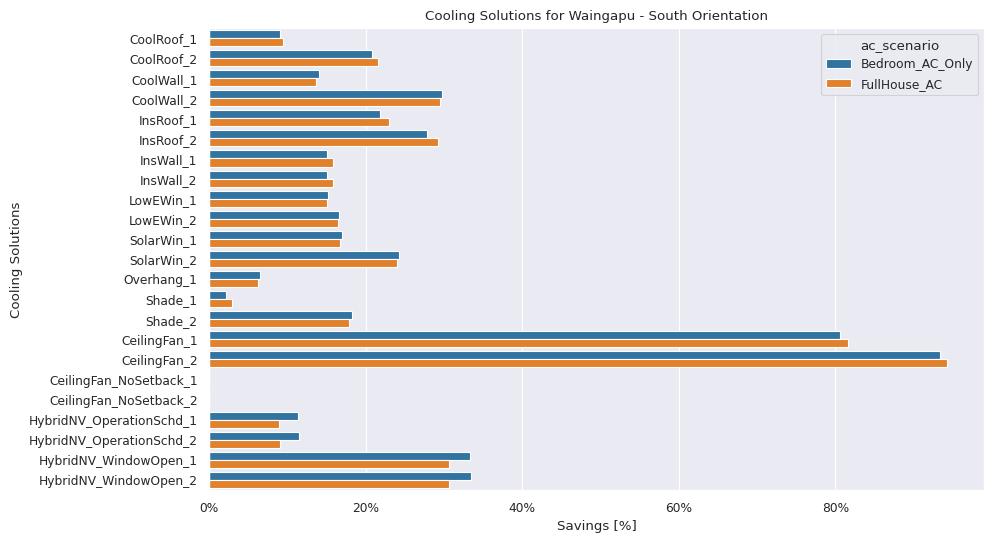

In [83]:
# Create the figure: south orientation, bedroom ac only vs full ac, pct savings
cooling_solution_shortlist = ['CoolRoof_1', 'CoolRoof_2', 
                         'CoolWall_1', 'CoolWall_2',
                         'InsRoof_1', 'InsRoof_2', 
                         'InsWall_1', 'InsWall_2', 
                         'LowEWin_1', 'LowEWin_2', 
                         'SolarWin_1', 'SolarWin_2',
                         'Overhang_1',
                         'Shade_1', 'Shade_2',
                         'CeilingFan_1','CeilingFan_2', 
                         'CeilingFan_NoSetback_1', 'CeilingFan_NoSetback_2', 
                         'HybridNV_OperationSchd_1', 'HybridNV_OperationSchd_2',
                         'HybridNV_WindowOpen_1', 'HybridNV_WindowOpen_2']

cooling_solution_list = ['CoolRoof_1_savings_pct', 'CoolRoof_2_savings_pct', 
                         'CoolWall_1_savings_pct', 'CoolWall_2_savings_pct',
                         'InsRoof_1_savings_pct', 'InsRoof_2_savings_pct', 
                         'InsWall_1_savings_pct', 'InsWall_2_savings_pct', 
                         'LowEWin_1_savings_pct', 'LowEWin_2_savings_pct', 
                         'SolarWin_1_savings_pct', 'SolarWin_2_savings_pct',
                         'Overhang_1_savings_pct',
                         'Shade_1_savings_pct', 'Shade_2_savings_pct',
                         'CeilingFan_1_savings_pct','CeilingFan_2_savings_pct', 
                         'CeilingFan_NoSetback_1_savings_pct', 'CeilingFan_NoSetback_2_savings_pct', 
                         'HybridNV_OperationSchd_1_savings_pct', 'HybridNV_OperationSchd_2_savings_pct',
                         'HybridNV_WindowOpen_1_savings_pct', 'HybridNV_WindowOpen_2_savings_pct']
# Create a subset of the dataframe for plotting
for location in melted_df['location'].unique():
    plot_df = melted_df.loc[(melted_df['location']==location) & (melted_df['orientation']=='South') & (melted_df['ac_scenario'].isin(['Bedroom_AC_Only', 'FullHouse_AC'])) & (melted_df['case_name'].isin(cooling_solution_list))].copy()
    plot_df['case_name_short'] = plot_df['case_name'].str.split('_').str[:-2].str.join('_')
    plot_df['pct_savings'] = plot_df['value']*100
    # Create the plot
    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                            sharey=False, sharex=False)
    fig.subplots_adjust(hspace=.1, wspace=.1)
    sns.barplot(data=plot_df, y='case_name_short', x='pct_savings', orient="h", order=cooling_solution_shortlist, 
                hue='ac_scenario', ax=ax1)

    # Formatting the plot
    ax1.set_title('Cooling Solutions for {} - South Orientation'.format(location))
    ax1.set_ylabel('Cooling Solutions')
    ax1.set_xlabel('Savings [%]')
    ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

    # Save the plot into png [shared with others] and svg formats [insert into office documents]
    for graph_type in ['png','svg']:
        fig.savefig('plot/pct_savings_{}.{}'.format(location, graph_type), 
                    dpi=600, format=graph_type, bbox_inches='tight')

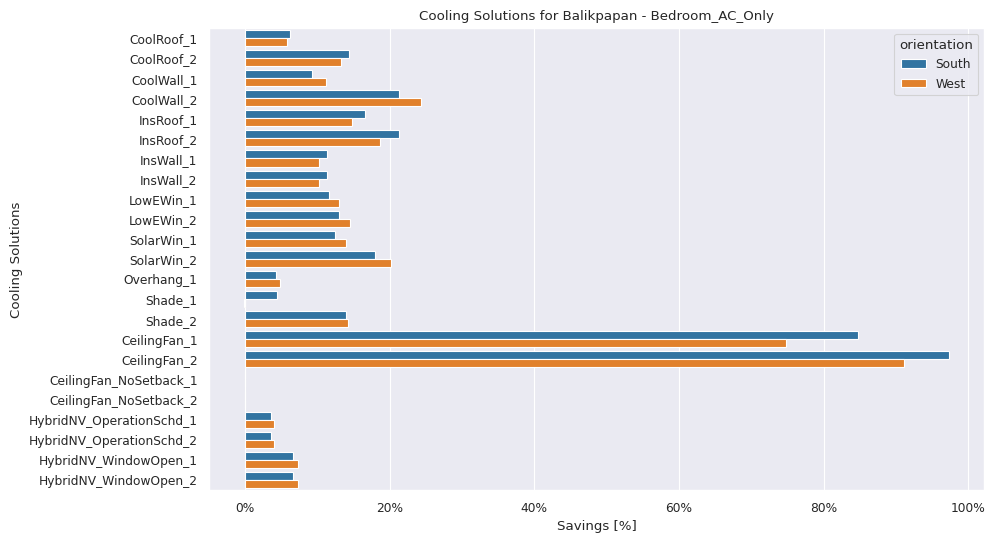

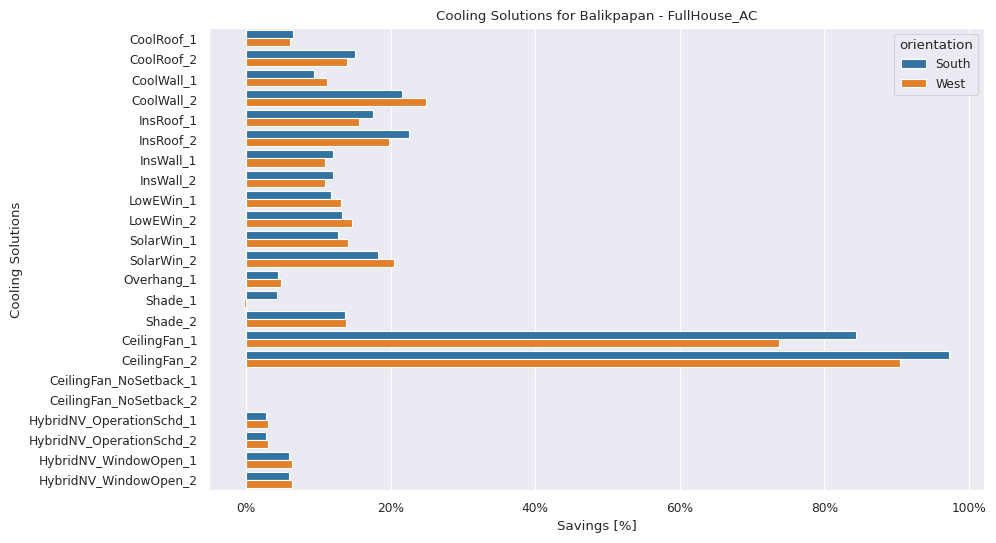

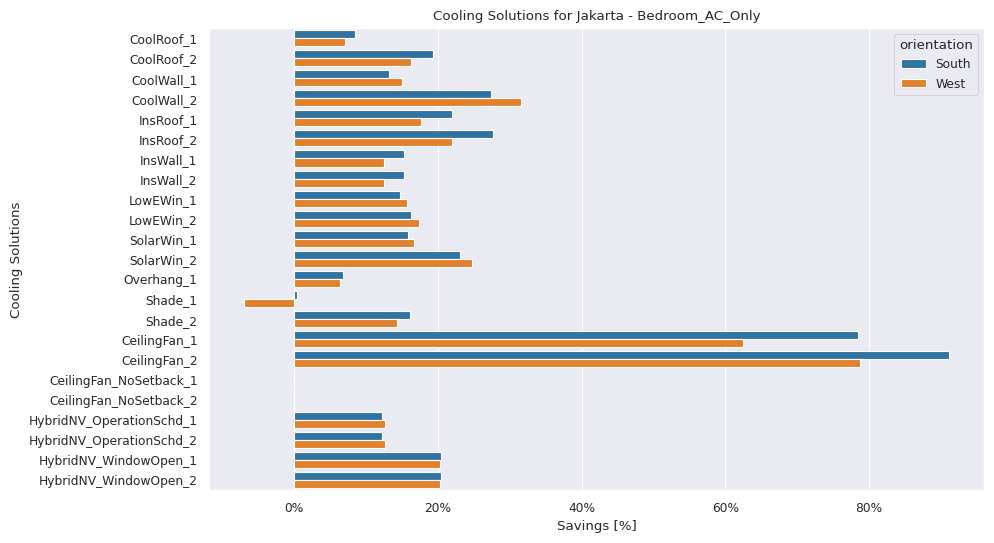

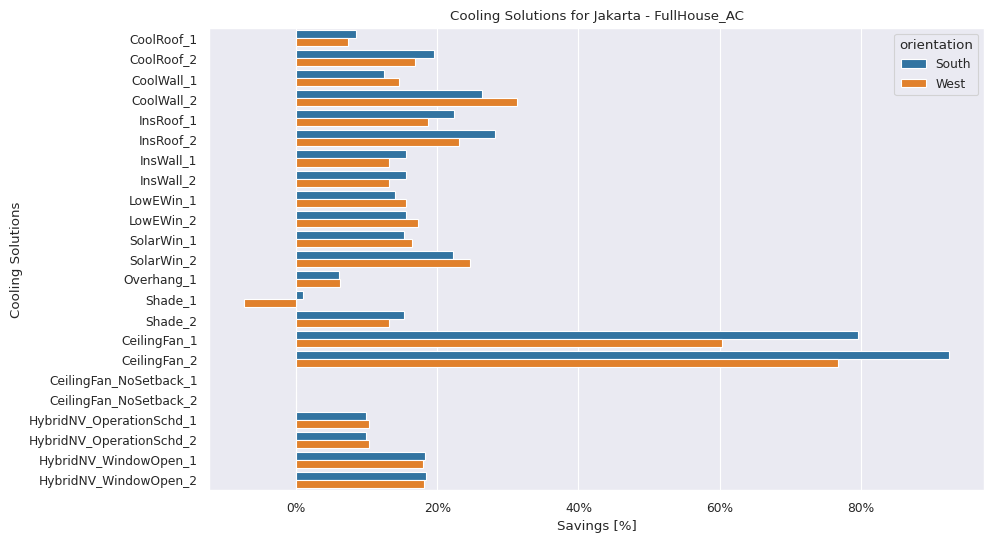

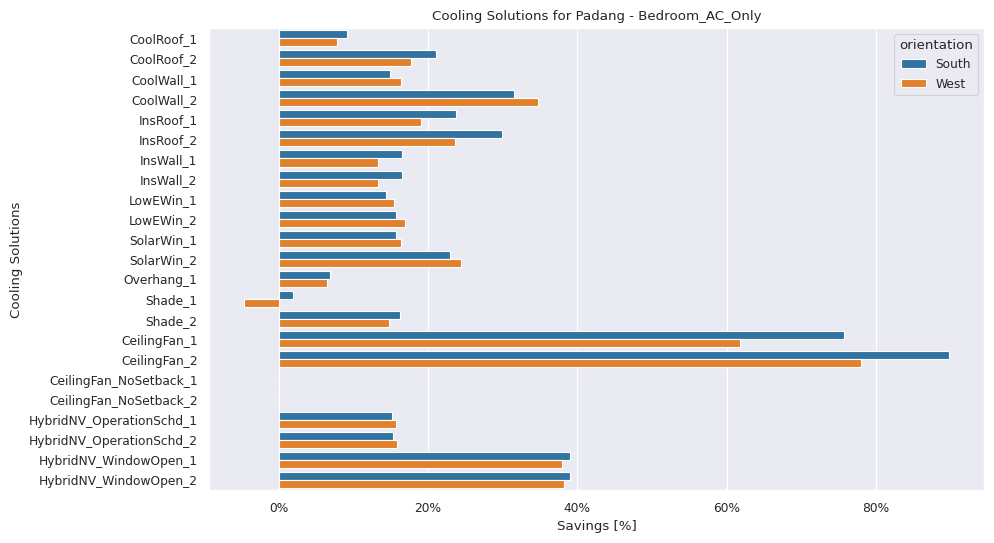

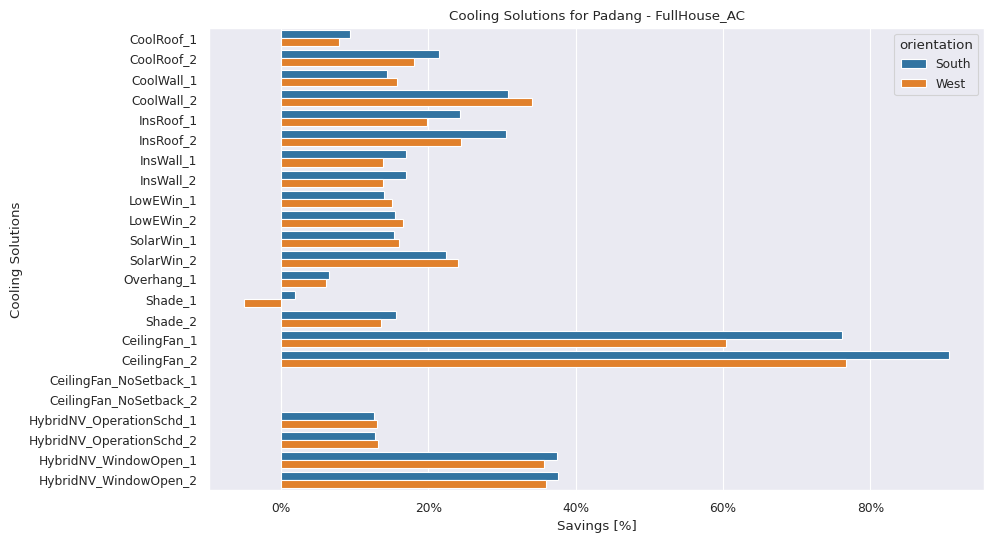

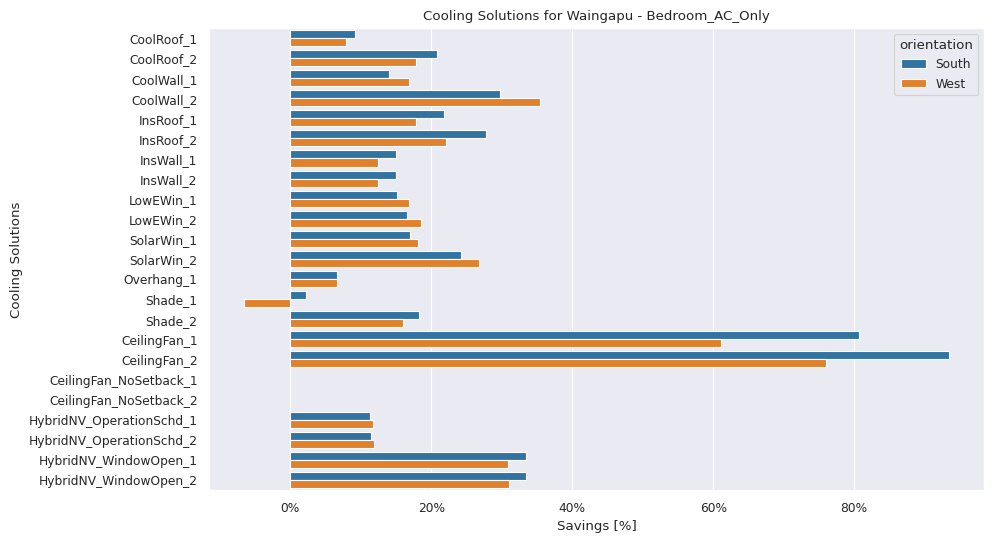

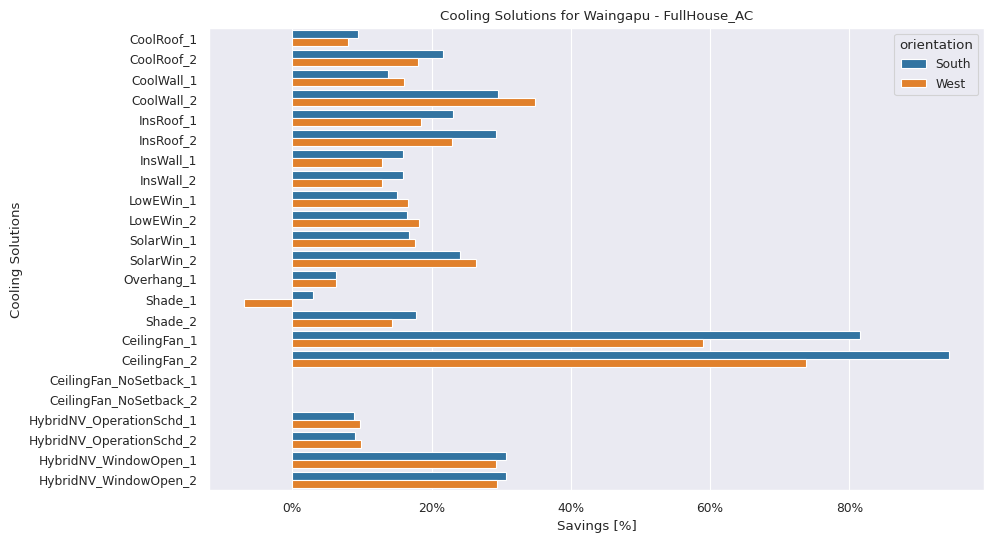

In [86]:
# Create the figure: south vs. west orientation, bedroom ac only, pct savings
# Create a subset of the dataframe for plotting
for location in melted_df['location'].unique():
    for ac_scenario in ['Bedroom_AC_Only', 'FullHouse_AC']:
        plot_df = melted_df.loc[(melted_df['location']==location) & (melted_df['ac_scenario'].isin([ac_scenario])) & (melted_df['case_name'].isin(cooling_solution_list))].copy()
        plot_df['case_name_short'] = plot_df['case_name'].str.split('_').str[:-2].str.join('_')
        plot_df['pct_savings'] = plot_df['value']*100
        # Create the plot
        fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                                sharey=False, sharex=False)
        fig.subplots_adjust(hspace=.1, wspace=.1)
        sns.barplot(data=plot_df, y='case_name_short', x='pct_savings', orient="h", order=cooling_solution_shortlist, 
                    hue='orientation', ax=ax1)

        # Formatting the plot
        ax1.set_title('Cooling Solutions for {} - {}'.format(location, ac_scenario))
        ax1.set_ylabel('Cooling Solutions')
        ax1.set_xlabel('Savings [%]')
        ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

        fig.savefig('plot/pct_savings_{}_{}.png'.format(location, ac_scenario), 
                    dpi=300, format='png', bbox_inches='tight')

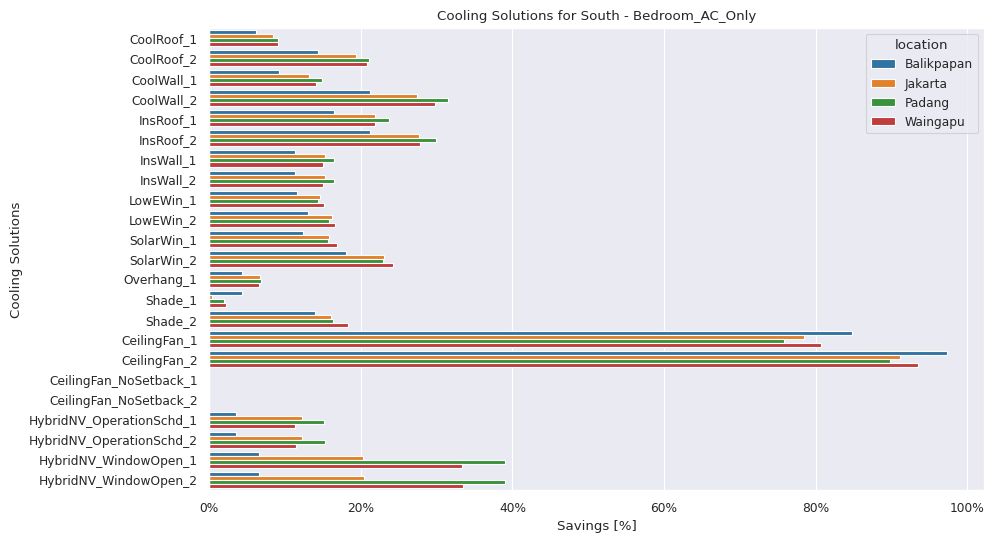

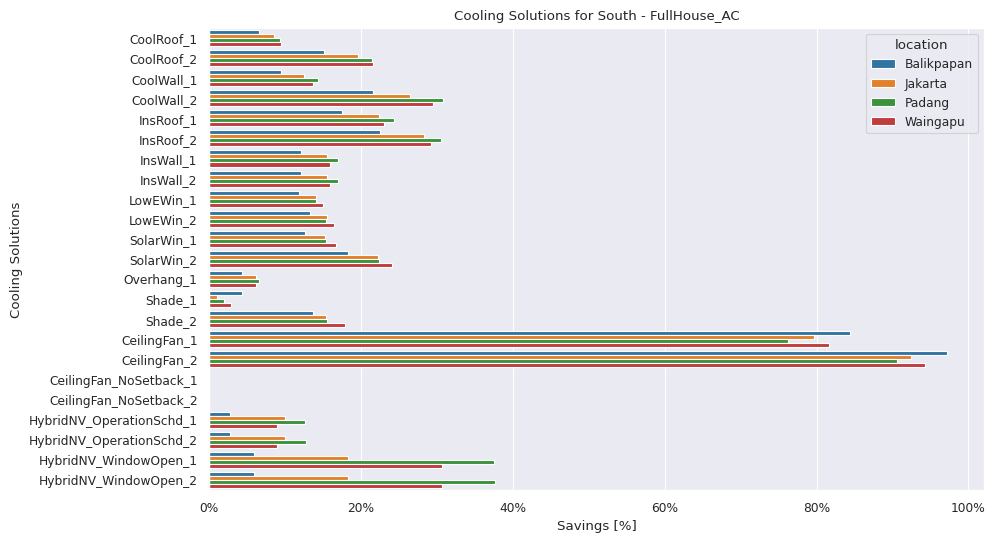

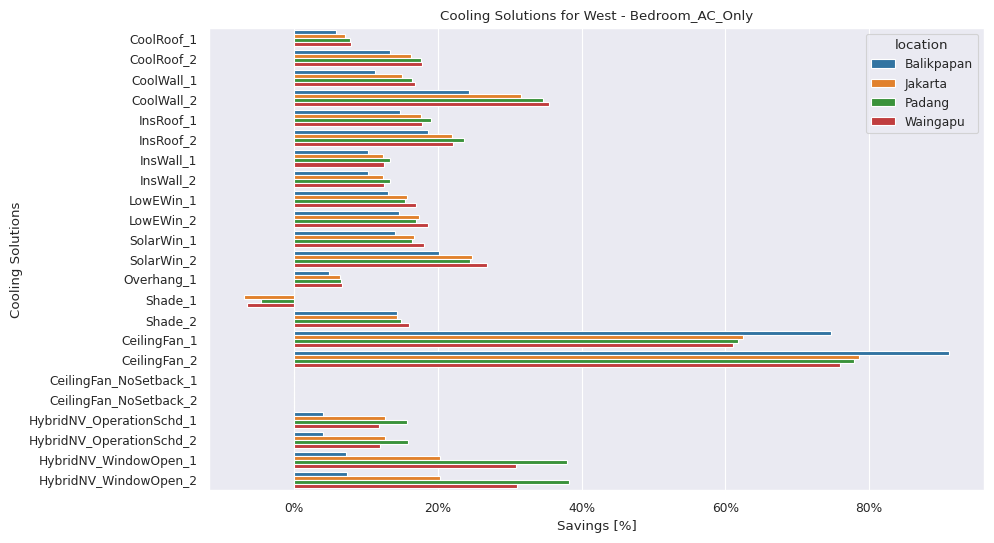

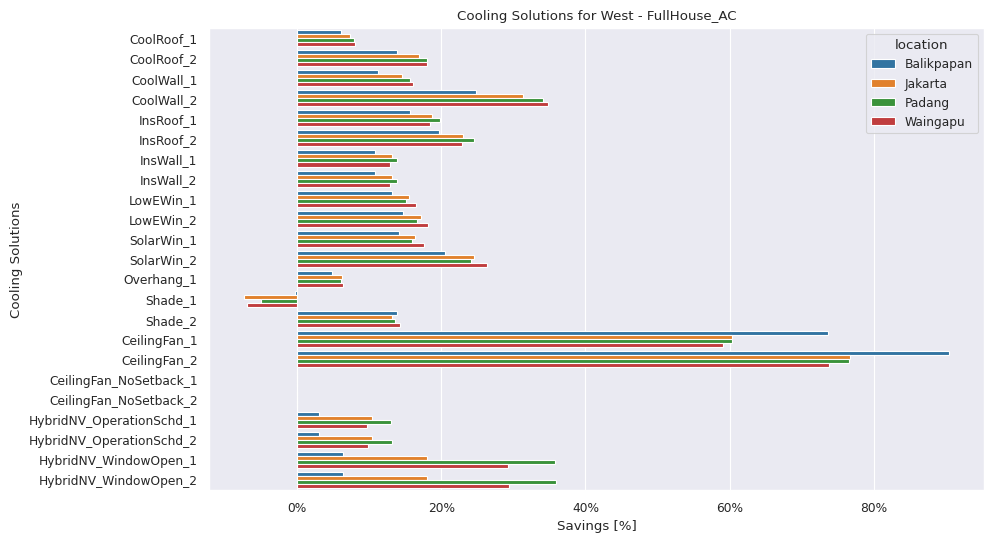

In [88]:
# Create the figure: south orientation, bedroom ac only, pct savings comparison between locations
# Create a subset of the dataframe for plotting
for orientation in melted_df['orientation'].unique():
    for ac_scenario in ['Bedroom_AC_Only', 'FullHouse_AC']:
        plot_df = melted_df.loc[(melted_df['orientation']==orientation) & (melted_df['ac_scenario'].isin([ac_scenario])) & (melted_df['case_name'].isin(cooling_solution_list))].copy()
        plot_df['case_name_short'] = plot_df['case_name'].str.split('_').str[:-2].str.join('_')
        plot_df['pct_savings'] = plot_df['value']*100
        # Create the plot
        fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                                sharey=False, sharex=False)
        fig.subplots_adjust(hspace=.1, wspace=.1)
        sns.barplot(data=plot_df, y='case_name_short', x='pct_savings', orient="h", order=cooling_solution_shortlist, 
                    hue='location', ax=ax1)

        # Formatting the plot
        ax1.set_title('Cooling Solutions for {} - {}'.format(orientation, ac_scenario))
        ax1.set_ylabel('Cooling Solutions')
        ax1.set_xlabel('Savings [%]')
        ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

        fig.savefig('plot/pct_savings_{}_{}.png'.format(orientation, ac_scenario), 
                    dpi=300, format='png', bbox_inches='tight')

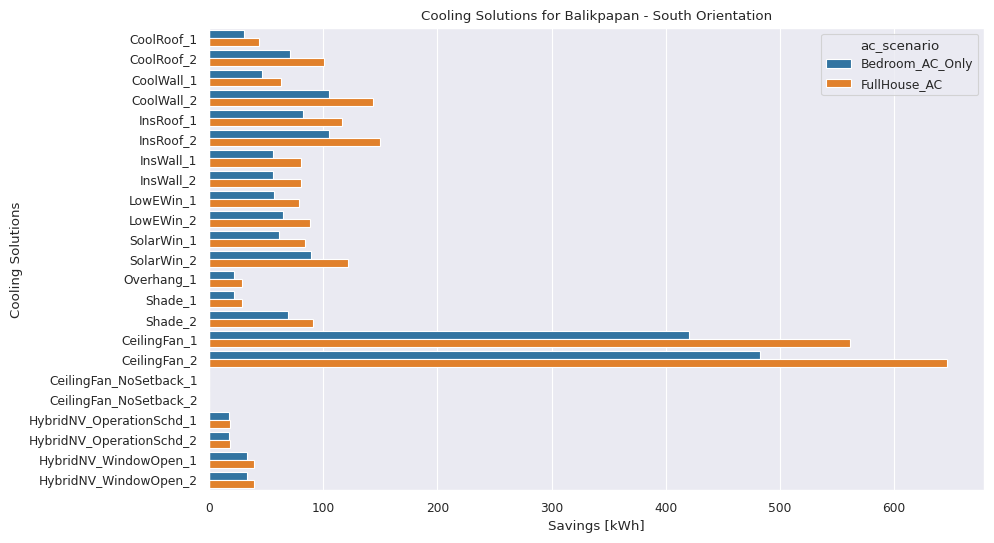

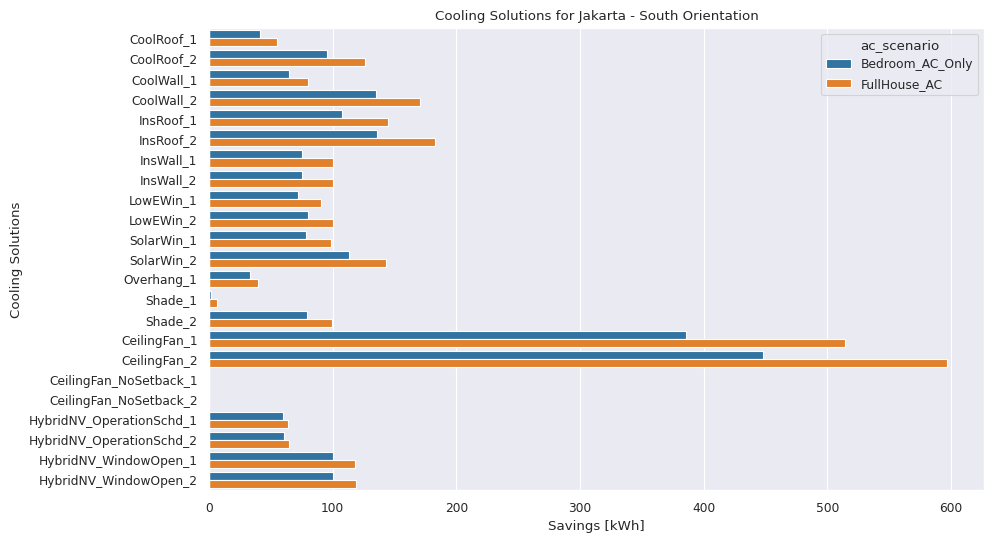

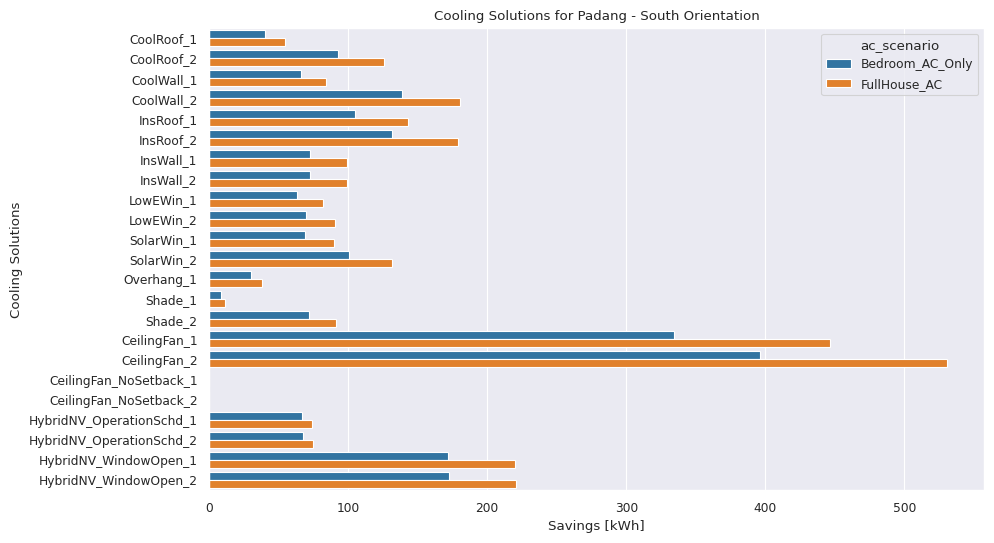

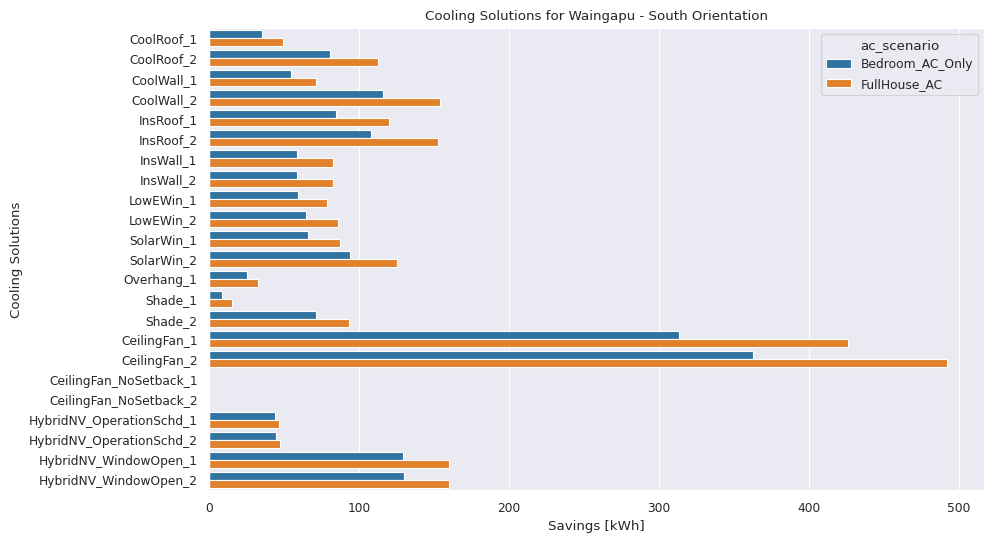

In [91]:
## Create absolute savings plots
# Create the figure: south orientation, bedroom ac only vs full ac, pct savings
cooling_solution_shortlist = ['CoolRoof_1', 'CoolRoof_2', 
                         'CoolWall_1', 'CoolWall_2',
                         'InsRoof_1', 'InsRoof_2', 
                         'InsWall_1', 'InsWall_2', 
                         'LowEWin_1', 'LowEWin_2', 
                         'SolarWin_1', 'SolarWin_2',
                         'Overhang_1',
                         'Shade_1', 'Shade_2',
                         'CeilingFan_1','CeilingFan_2', 
                         'CeilingFan_NoSetback_1', 'CeilingFan_NoSetback_2', 
                         'HybridNV_OperationSchd_1', 'HybridNV_OperationSchd_2',
                         'HybridNV_WindowOpen_1', 'HybridNV_WindowOpen_2']

cooling_solution_list = ['CoolRoof_1_savings_kwh', 'CoolRoof_2_savings_kwh', 
                         'CoolWall_1_savings_kwh', 'CoolWall_2_savings_kwh',
                         'InsRoof_1_savings_kwh', 'InsRoof_2_savings_kwh', 
                         'InsWall_1_savings_kwh', 'InsWall_2_savings_kwh', 
                         'LowEWin_1_savings_kwh', 'LowEWin_2_savings_kwh', 
                         'SolarWin_1_savings_kwh', 'SolarWin_2_savings_kwh',
                         'Overhang_1_savings_kwh',
                         'Shade_1_savings_kwh', 'Shade_2_savings_kwh',
                         'CeilingFan_1_savings_kwh','CeilingFan_2_savings_kwh', 
                         'CeilingFan_NoSetback_1_savings_kwh', 'CeilingFan_NoSetback_2_savings_kwh', 
                         'HybridNV_OperationSchd_1_savings_kwh', 'HybridNV_OperationSchd_2_savings_kwh',
                         'HybridNV_WindowOpen_1_savings_kwh', 'HybridNV_WindowOpen_2_savings_kwh']
# Create a subset of the dataframe for plotting
for location in melted_df['location'].unique():
    plot_df = melted_df.loc[(melted_df['location']==location) & (melted_df['orientation']=='South') & (melted_df['ac_scenario'].isin(['Bedroom_AC_Only', 'FullHouse_AC'])) & (melted_df['case_name'].isin(cooling_solution_list))].copy()
    plot_df['case_name_short'] = plot_df['case_name'].str.split('_').str[:-2].str.join('_')
    # Create the plot
    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                            sharey=False, sharex=False)
    fig.subplots_adjust(hspace=.1, wspace=.1)
    sns.barplot(data=plot_df, y='case_name_short', x='value', orient="h", order=cooling_solution_shortlist, 
                hue='ac_scenario', ax=ax1)

    # Formatting the plot
    ax1.set_title('Cooling Solutions for {} - South Orientation'.format(location))
    ax1.set_ylabel('Cooling Solutions')
    ax1.set_xlabel('Savings [kWh]')
    # ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

    fig.savefig('plot/kwh_savings_{}.png'.format(location), dpi=300, format='png', bbox_inches='tight')

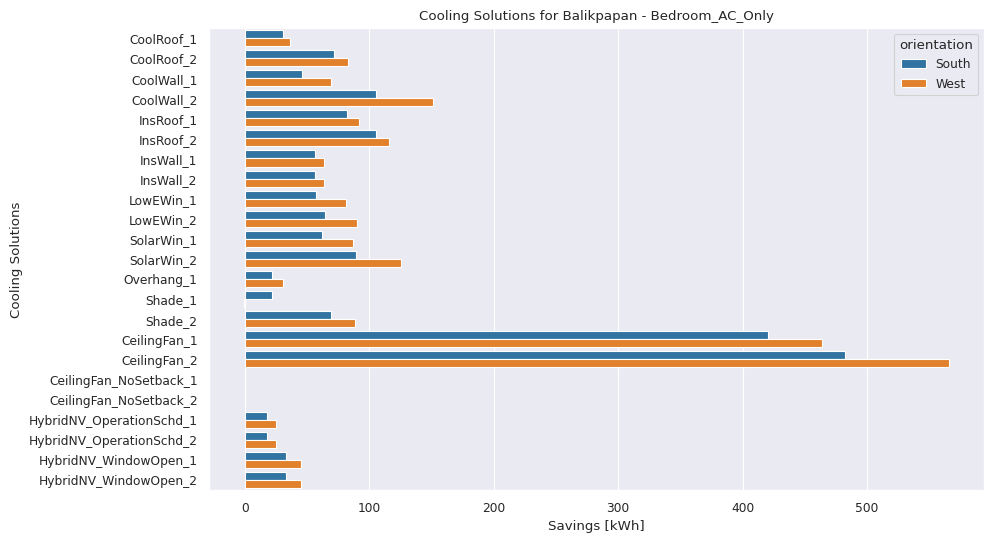

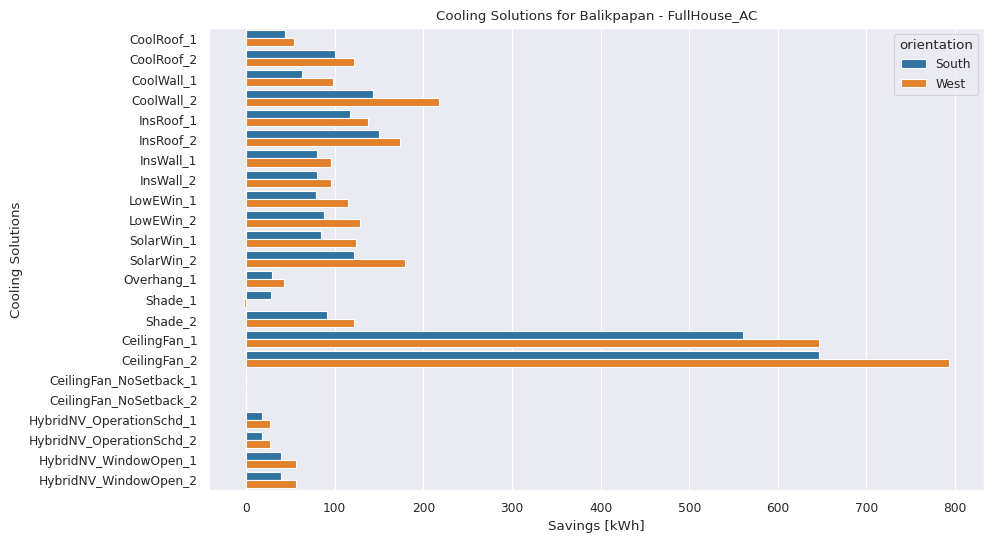

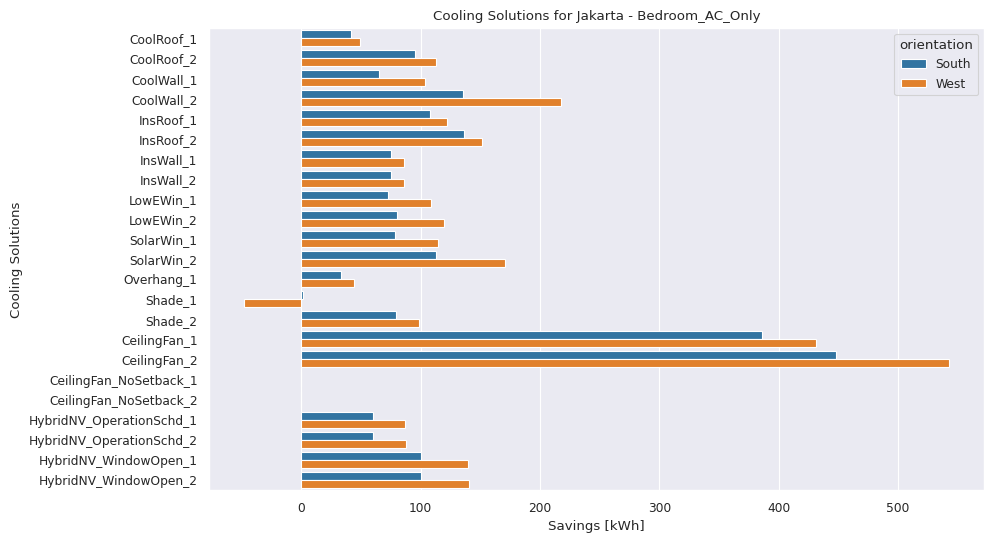

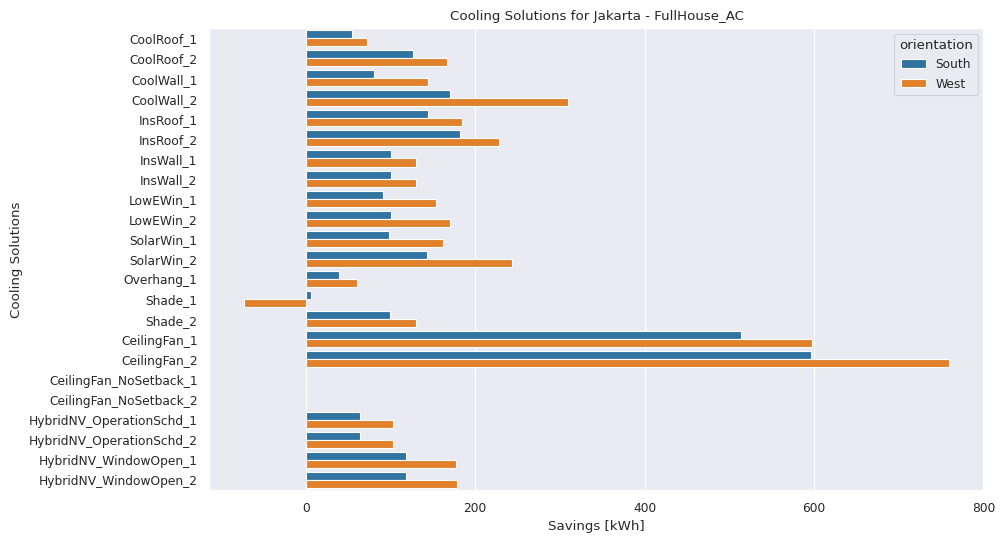

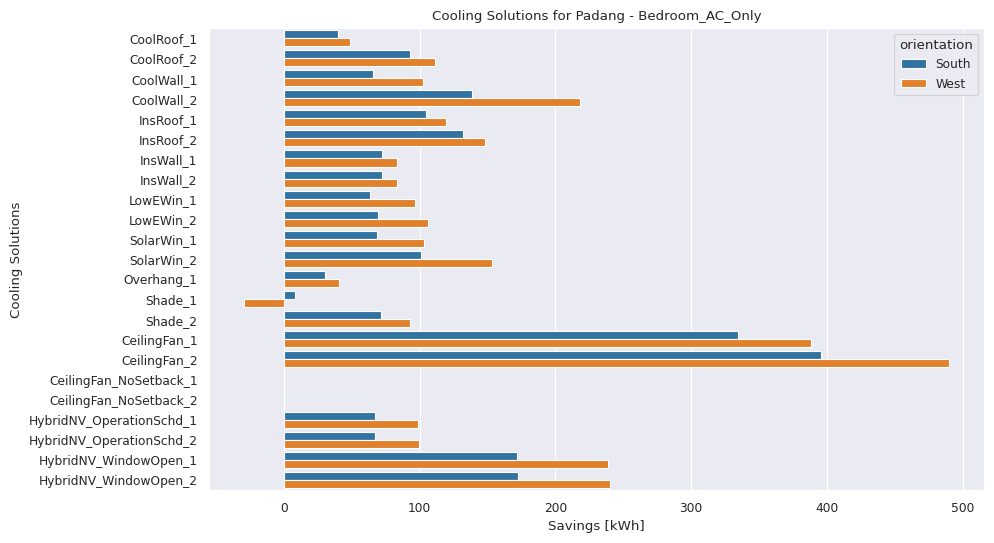

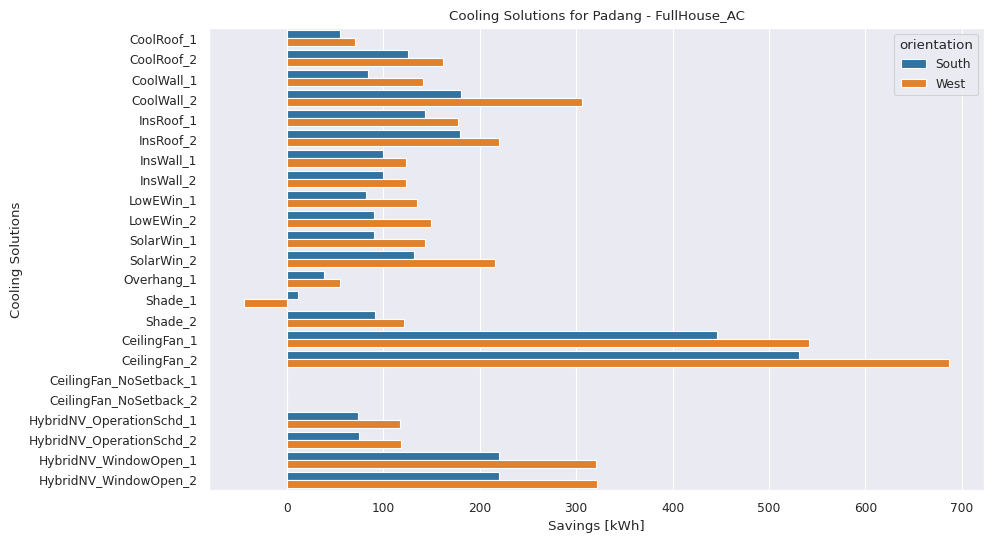

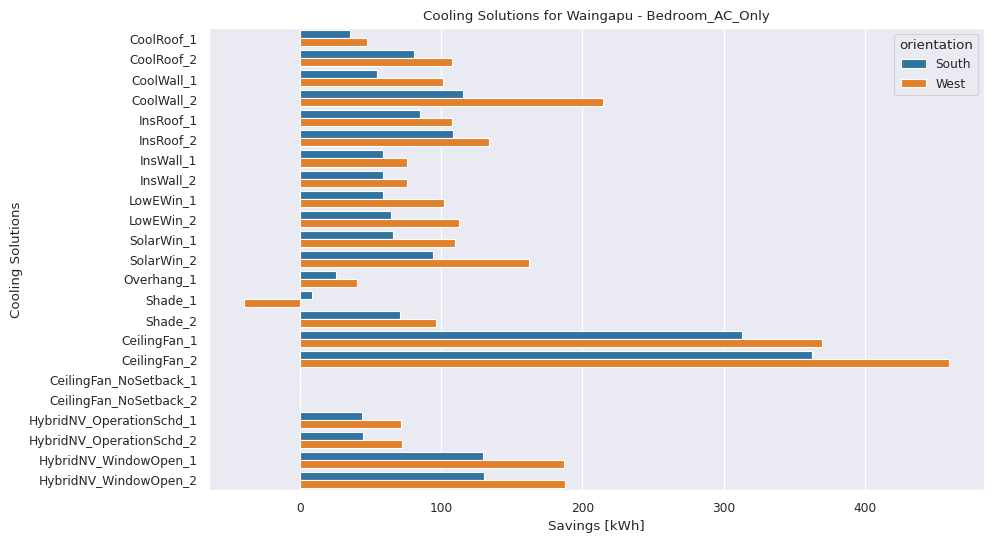

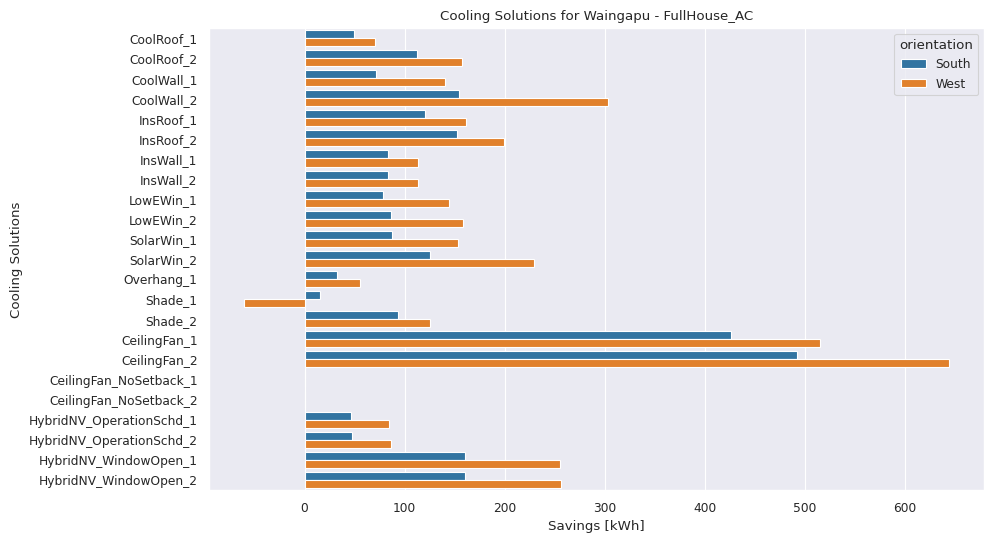

In [92]:
# Create the figure: south vs. west orientation, bedroom ac only, kwh savings
for location in melted_df['location'].unique():
    for ac_scenario in ['Bedroom_AC_Only', 'FullHouse_AC']:
        plot_df = melted_df.loc[(melted_df['location']==location) & (melted_df['ac_scenario'].isin([ac_scenario])) & (melted_df['case_name'].isin(cooling_solution_list))].copy()
        plot_df['case_name_short'] = plot_df['case_name'].str.split('_').str[:-2].str.join('_')
        # Create the plot
        fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                                sharey=False, sharex=False)
        fig.subplots_adjust(hspace=.1, wspace=.1)
        sns.barplot(data=plot_df, y='case_name_short', x='value', orient="h", order=cooling_solution_shortlist, 
                    hue='orientation', ax=ax1)

        # Formatting the plot
        ax1.set_title('Cooling Solutions for {} - {}'.format(location, ac_scenario))
        ax1.set_ylabel('Cooling Solutions')
        ax1.set_xlabel('Savings [kWh]')
        # ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

        fig.savefig('plot/kwh_savings_{}_{}.png'.format(location, ac_scenario), 
                    dpi=300, format='png', bbox_inches='tight')

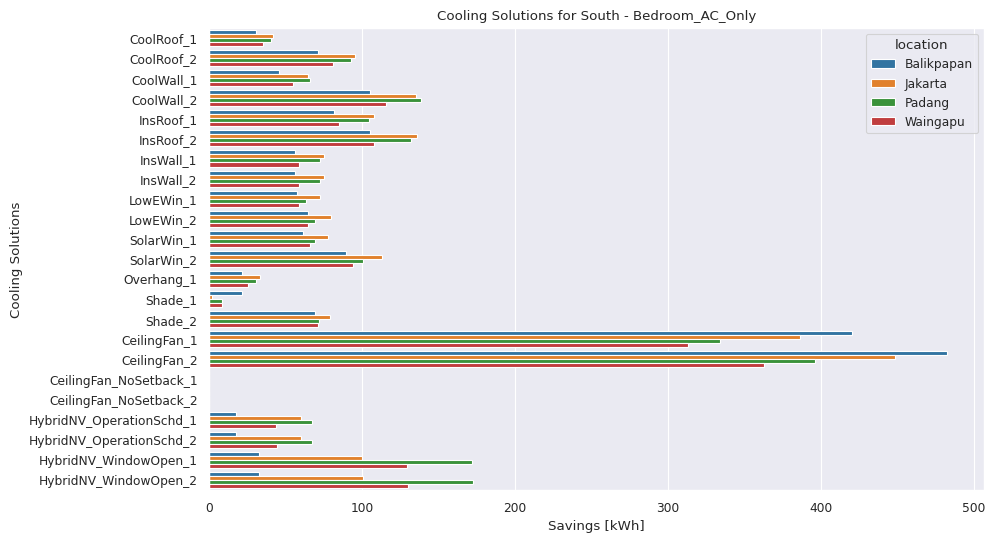

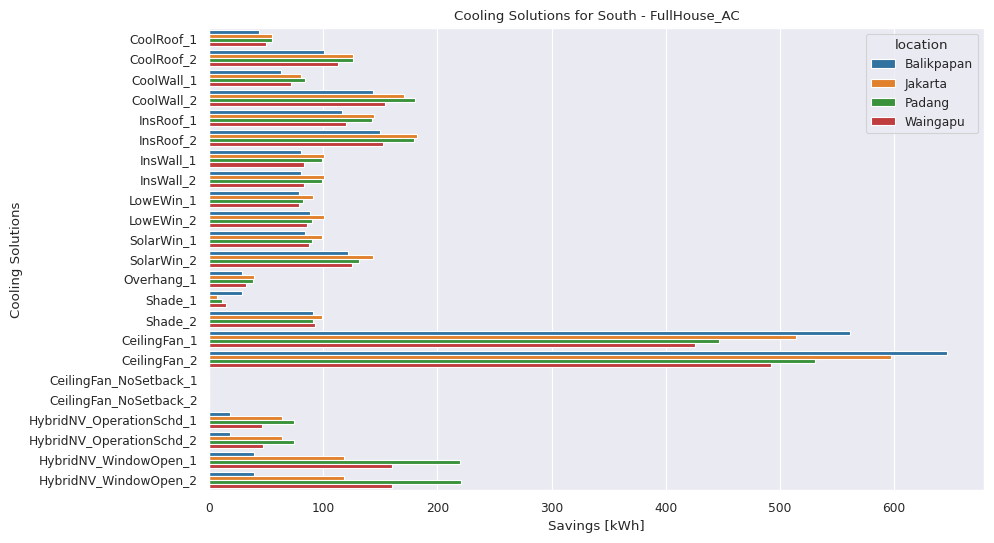

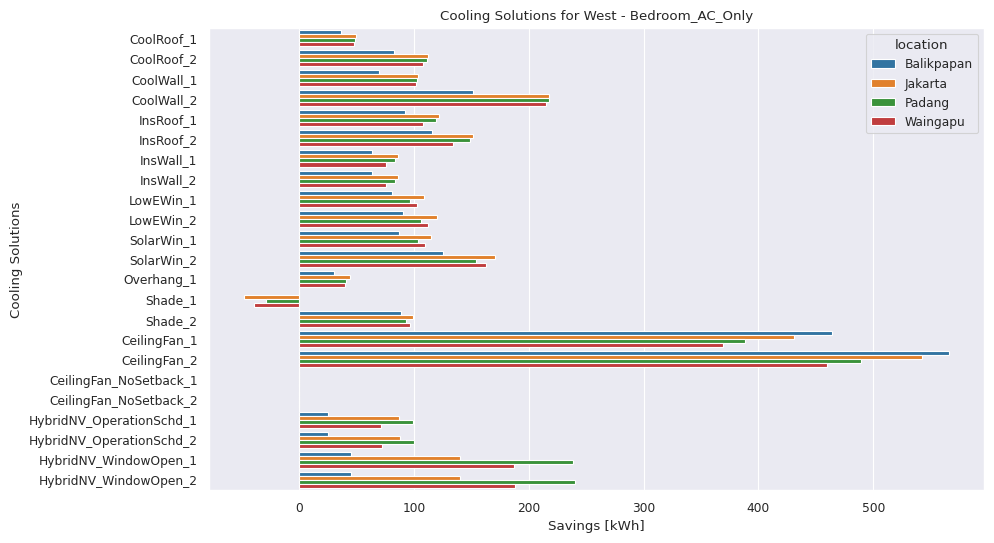

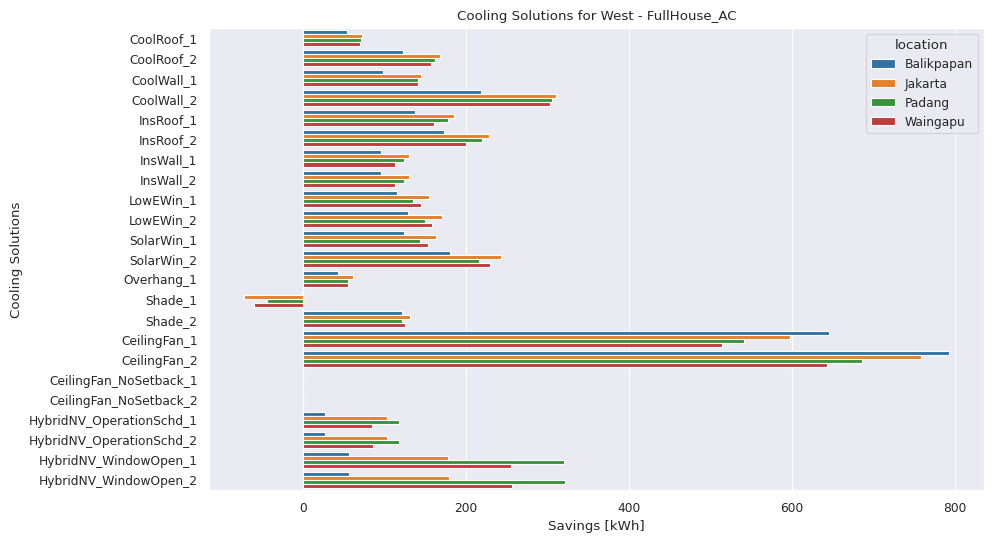

In [94]:
# Create the figure: south orientation, bedroom ac only, kwh savings comparison between locations
# Create a subset of the dataframe for plotting
for orientation in melted_df['orientation'].unique():
    for ac_scenario in ['Bedroom_AC_Only', 'FullHouse_AC']:
        plot_df = melted_df.loc[(melted_df['orientation']==orientation) & (melted_df['ac_scenario'].isin([ac_scenario])) & (melted_df['case_name'].isin(cooling_solution_list))].copy()
        plot_df['case_name_short'] = plot_df['case_name'].str.split('_').str[:-2].str.join('_')
        # Create the plot
        fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                                sharey=False, sharex=False)
        fig.subplots_adjust(hspace=.1, wspace=.1)
        sns.barplot(data=plot_df, y='case_name_short', x='value', orient="h", order=cooling_solution_shortlist, 
                    hue='location', ax=ax1)

        # Formatting the plot
        ax1.set_title('Cooling Solutions for {} - {}'.format(orientation, ac_scenario))
        ax1.set_ylabel('Cooling Solutions')
        ax1.set_xlabel('Savings [kWh]')
        # ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

        fig.savefig('plot/kwh_savings_{}_{}.png'.format(orientation, ac_scenario), 
                    dpi=300, format='png', bbox_inches='tight')

In [64]:
# Read the csv file
df2 = pd.read_csv('IDN_Res_Savings.csv')
# List of strings to search for
search_strings = ['Baseline', 'kwh', 'pct']

# Find columns that contain any of the search strings
matching_columns = [col for col in df2.columns if col.split('_')[-1] in search_strings]

# Melt the dataframe
melted_df = pd.melt(df2, id_vars=['location','orientation','ac_scenario'], 
                    value_vars=matching_columns, 
                    var_name='case_name', value_name='value')
melted_df.head()

location orientation      ac_scenario case_name    value
0  Balikpapan       South  Bedroom_AC_Only  Baseline   495.65
1  Balikpapan       South     FullHouse_AC  Baseline  2685.39
2  Balikpapan       South            No_AC  Baseline     0.00
3  Balikpapan        West  Bedroom_AC_Only  Baseline   620.92
4  Balikpapan        West     FullHouse_AC  Baseline  3218.07

In [69]:
cooling_solution_list = ['Baseline_savings_kwh', 'CoolRoof_1_savings_kwh', 'CoolRoof_2_savings_kwh', 
                         'CoolWall_1_savings_kwh', 'CoolWall_2_savings_kwh',
                         'InsRoof_1_savings_kwh', 'InsRoof_2_savings_kwh', 
                         'InsWall_1_savings_kwh', 'InsWall_2_savings_kwh', 
                         'LowEWin_1_savings_kwh', 'LowEWin_2_savings_kwh', 
                         'SolarWin_1_savings_kwh', 'SolarWin_2_savings_kwh',
                         'Overhang_1_savings_kwh',
                         'Shade_1_savings_kwh', 'Shade_2_savings_kwh',
                         'CeilingFan_1_savings_kwh','CeilingFan_2_savings_kwh', 
                         'CeilingFan_NoSetback_1_savings_kwh', 'CeilingFan_NoSetback_2_savings_kwh', 
                         'HybridNV_OperationSchd_1_savings_kwh', 'HybridNV_OperationSchd_2_savings_kwh',
                         'HybridNV_WindowOpen_1_savings_kwh', 'HybridNV_WindowOpen_2_savings_kwh']

# Create a subset of the dataframe for plotting
plot_df = pd.DataFrame()
for location in melted_df['location'].unique():
    for orientation in melted_df['orientation'].unique():
        for ac_scenario in melted_df['ac_scenario'].unique():
            group_df = melted_df.loc[(melted_df['location']==location) & (melted_df['orientation']==orientation) & (melted_df['ac_scenario']==ac_scenario) & (melted_df['case_name'].isin(cooling_solution_list))].copy()

            # merge the two dataframes
            plot_df = pd.concat([plot_df, group_df], ignore_index=True)

In [72]:
cooling_solution_list = ['Baseline_savings_pct', 'CoolRoof_1_savings_pct', 'CoolRoof_2_savings_pct', 
                         'CoolWall_1_savings_pct', 'CoolWall_2_savings_pct',
                         'InsRoof_1_savings_pct', 'InsRoof_2_savings_pct', 
                         'InsWall_1_savings_pct', 'InsWall_2_savings_pct', 
                         'LowEWin_1_savings_pct', 'LowEWin_2_savings_pct', 
                         'SolarWin_1_savings_pct', 'SolarWin_2_savings_pct',
                         'Overhang_1_savings_pct',
                         'Shade_1_savings_pct', 'Shade_2_savings_pct',
                         'CeilingFan_1_savings_pct','CeilingFan_2_savings_pct', 
                         'CeilingFan_NoSetback_1_savings_pct', 'CeilingFan_NoSetback_2_savings_pct', 
                         'HybridNV_OperationSchd_1_savings_pct', 'HybridNV_OperationSchd_2_savings_pct',
                         'HybridNV_WindowOpen_1_savings_pct', 'HybridNV_WindowOpen_2_savings_pct']

# Create a subset of the dataframe for plotting
plot_df = pd.DataFrame()
for location in melted_df['location'].unique():
    for orientation in melted_df['orientation'].unique():
        for ac_scenario in melted_df['ac_scenario'].unique():
            group_df = melted_df.loc[(melted_df['location']==location) & (melted_df['orientation']==orientation) & (melted_df['ac_scenario']==ac_scenario) & (melted_df['case_name'].isin(cooling_solution_list))].copy()

            # merge the two dataframes
            plot_df = pd.concat([plot_df, group_df], ignore_index=True)

plot_df.to_csv('IDN_Res_Savings_fractional_electricity.csv', index=False)

In [41]:
## Create absolute savings plots
# Create the figure: south orientation, bedroom ac only vs full ac, pct savings
cooling_solution_shortlist = ['CoolRoof_1', 'CoolRoof_2', 
                         'CoolWall_1', 'CoolWall_2',
                         'InsRoof_1', 'InsRoof_2', 
                         'InsWall_1', 'InsWall_2', 
                         'LowEWin_1', 'LowEWin_2', 
                         'SolarWin_1', 'SolarWin_2',
                         'Overhang_1',
                         'Shade_1', 'Shade_2',
                         'CeilingFan_1','CeilingFan_2', 
                         'CeilingFan_NoSetback_1', 'CeilingFan_NoSetback_2', 
                         'HybridNV_OperationSchd_1', 'HybridNV_OperationSchd_2',
                         'HybridNV_WindowOpen_1', 'HybridNV_WindowOpen_2']

cooling_solution_list = ['CoolRoof_1_savings_kwh', 'CoolRoof_2_savings_kwh', 
                         'CoolWall_1_savings_kwh', 'CoolWall_2_savings_kwh',
                         'InsRoof_1_savings_kwh', 'InsRoof_2_savings_kwh', 
                         'InsWall_1_savings_kwh', 'InsWall_2_savings_kwh', 
                         'LowEWin_1_savings_kwh', 'LowEWin_2_savings_kwh', 
                         'SolarWin_1_savings_kwh', 'SolarWin_2_savings_kwh',
                         'Overhang_1_savings_kwh',
                         'Shade_1_savings_kwh', 'Shade_2_savings_kwh',
                         'CeilingFan_1_savings_kwh','CeilingFan_2_savings_kwh', 
                         'CeilingFan_NoSetback_1_savings_kwh', 'CeilingFan_NoSetback_2_savings_kwh', 
                         'HybridNV_OperationSchd_1_savings_kwh', 'HybridNV_OperationSchd_2_savings_kwh',
                         'HybridNV_WindowOpen_1_savings_kwh', 'HybridNV_WindowOpen_2_savings_kwh']

# Create a subset of the dataframe for plotting
plot_df = pd.DataFrame()
for location in melted_df['location'].unique():
    group_bedroom = melted_df.loc[(melted_df['location']==location) & (melted_df['orientation']=='South') & (melted_df['ac_scenario']=='Bedroom_AC_Only') & (melted_df['case_name'].isin(cooling_solution_list))].copy()
    group_fullhouse = melted_df.loc[(melted_df['location']==location) & (melted_df['orientation']=='South') & (melted_df['ac_scenario']=='FullHouse_AC') & (melted_df['case_name'].isin(cooling_solution_list))].copy()

    # Add the savings ratio column
    group_fullhouse['ratio_saving_kwh'] = group_fullhouse['value'].values/group_bedroom['value'].values

    # merge the two dataframes
    plot_df = pd.concat([plot_df, group_fullhouse], ignore_index=True)
    


/tmp/ipykernel_464555/2024360461.py:36: RuntimeWarning: invalid value encountered in divide
  group_fullhouse['ratio_saving_kwh'] = group_fullhouse['value'].values/group_bedroom['value'].values
/tmp/ipykernel_464555/2024360461.py:36: RuntimeWarning: invalid value encountered in divide
  group_fullhouse['ratio_saving_kwh'] = group_fullhouse['value'].values/group_bedroom['value'].values
/tmp/ipykernel_464555/2024360461.py:36: RuntimeWarning: invalid value encountered in divide
  group_fullhouse['ratio_saving_kwh'] = group_fullhouse['value'].values/group_bedroom['value'].values
/tmp/ipykernel_464555/2024360461.py:36: RuntimeWarning: invalid value encountered in divide
  group_fullhouse['ratio_saving_kwh'] = group_fullhouse['value'].values/group_bedroom['value'].values


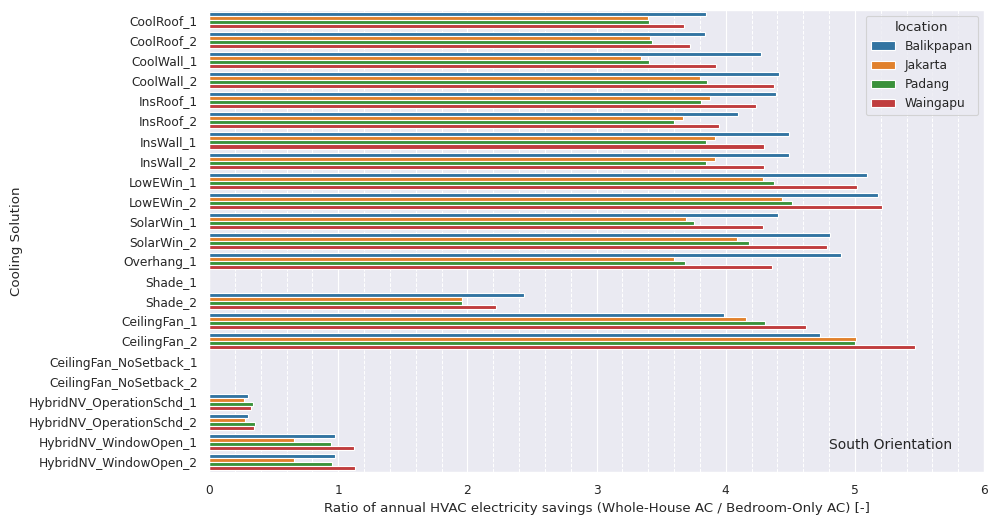

In [63]:
plot_df['case_name_short'] = plot_df['case_name'].str.split('_').str[:-2].str.join('_')
# Create the plot
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='case_name_short', x='ratio_saving_kwh', orient="h", order=cooling_solution_shortlist, 
            hue='location', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
# # Get the x-ticks locations
# yticks = plt.yticks()[0]

# # Calculate the positions of group separators
# group_positions = [(yticks[i] + yticks[i+1])/2 for i in range(len(yticks)-1)]

# # Draw vertical lines to separate groups
# for pos in group_positions:
#     plt.axhline(pos, color='gray', linestyle='-')

# Formatting the plot
# ax1.set_title('Comparison between Bedroom_AC_Only and Fullhouse_AC Scenarios')
ax1.set_ylabel('Cooling Solution')
ax1.set_xlim(0, 6)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Ratio of annual HVAC electricity savings (Whole-House AC / Bedroom-Only AC) [-]')
# ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/ratio_kwh_savings.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


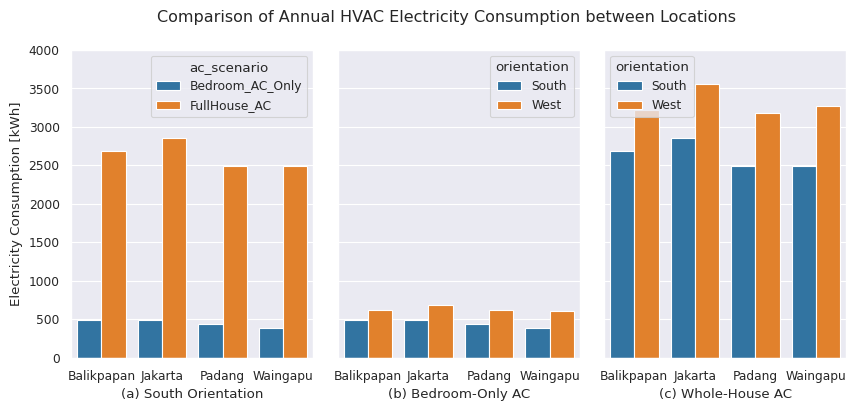

In [39]:
baseline_df = melted_df.loc[(melted_df['case_name']=='Baseline')].copy()

# Create the figure with two subplots: baseline comparsion between locations, group by ac scenarios, group by orientation
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4),facecolor='w', edgecolor='k',
                        sharey=True, sharex=True)
fig.subplots_adjust(hspace=.1, wspace=.1)

fig.suptitle('Comparison of Annual HVAC Electricity Consumption between Locations')
# Create a subset of the dataframe for plotting
plot_df = melted_df.loc[(melted_df['case_name']=='Baseline') & (melted_df['orientation'].isin(['South'])) & (melted_df['ac_scenario'].isin(['Bedroom_AC_Only', 'FullHouse_AC']))].copy()
sns.barplot(data=plot_df, x='location', y='value', orient="v", hue='ac_scenario', ax=ax1)

plot_df = melted_df.loc[(melted_df['case_name']=='Baseline') & (melted_df['ac_scenario'].isin(['Bedroom_AC_Only']))].copy()
sns.barplot(data=plot_df, x='location', y='value', orient="v", hue='orientation', ax=ax2)

plot_df = melted_df.loc[(melted_df['case_name']=='Baseline') & (melted_df['ac_scenario'].isin(['FullHouse_AC']))].copy()
sns.barplot(data=plot_df, x='location', y='value', orient="v", hue='orientation', ax=ax3)

# Formatting the plot
ax1.set_xlabel('(a) South Orientation')
ax1.set_ylabel('Electricity Consumption [kWh]')
ax1.set_ylim(0, 4000)
# ax1.set_xlabel('Location')

ax2.set_xlabel('(b) Bedroom-Only AC')
ax2.set_ylabel('')
ax2.set_ylim(0, 4000)
# ax2.set_xlabel('Location')

ax3.set_xlabel('(c) Whole-House AC')
ax3.set_ylabel('')
ax3.set_ylim(0, 4000)
# ax3.set_xlabel('Location')

# Save the plot into png [shared with others] and svg formats [insert into office documents]
for graph_type in ['png','svg']:
    fig.savefig('plot/annual_kwh.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')

In [2]:
# Read the csv file
df = pd.read_csv('AllScenarios_Occupancy_PPD_weighted_warm_discomfort.csv')
df.head()

df.rename(columns={'Geography':'location'}, inplace=True)
df['whole_bldg_avg_ppd_weighted'] = df['Whole Building: PPD-weighted warm discomfort exceedance hours (h): ']/8760
df['whole_bldg_avg_occ_ppd_weighted'] = df['Whole Building: Occupancy- and PPD-weighted warm discomfort exceedance hours (h): ']/8760


In [3]:
cooling_solution_shortlist = ['Baseline', 'CoolRoof_1', 'CoolRoof_2', 
                         'CoolWall_1', 'CoolWall_2',
                         'InsRoof_1', 'InsRoof_2', 
                         'InsWall_1', 'InsWall_2', 
                         'LowEWin_1', 'LowEWin_2', 
                         'SolarWin_1', 'SolarWin_2',
                         'Overhang_1',
                         'Shade_1', 'Shade_2',
                         'CeilingFan_1','CeilingFan_2', 
                         'CeilingFan_NoSetback_1', 'CeilingFan_NoSetback_2', 
                         'HybridNV_OperationSchd_1', 'HybridNV_OperationSchd_2',
                         'HybridNV_WindowOpen_1', 'HybridNV_WindowOpen_2']

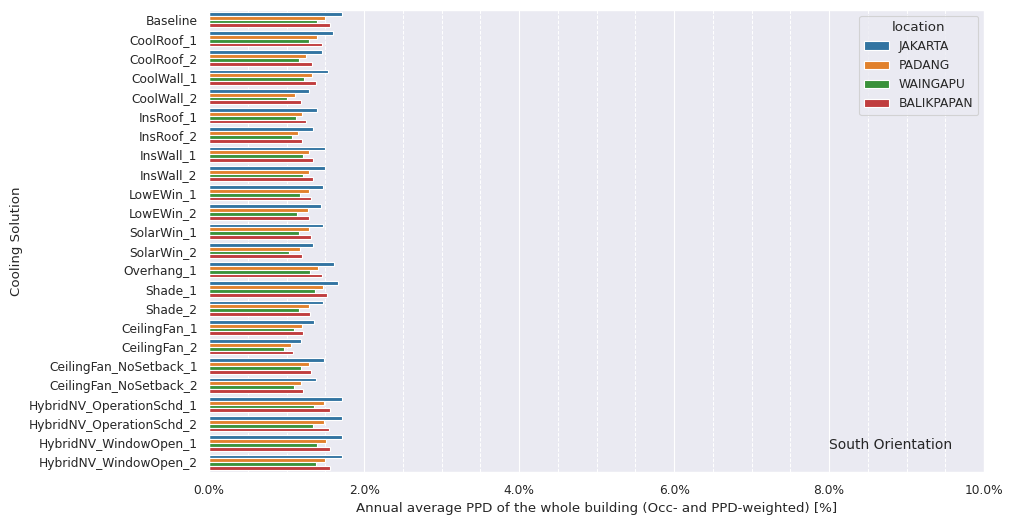

In [31]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['ac_scenario'].isin(['Bedroom_AC_Only']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', x='whole_bldg_avg_occ_ppd_weighted', orient="h", order=cooling_solution_shortlist, 
            hue='location', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
ax1.set_xlim(0, 10)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Annual average PPD of the whole building (Occ- and PPD-weighted) [%]')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/avg_whole_bldg_occ_ppd_weighted_discomfort_hours.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


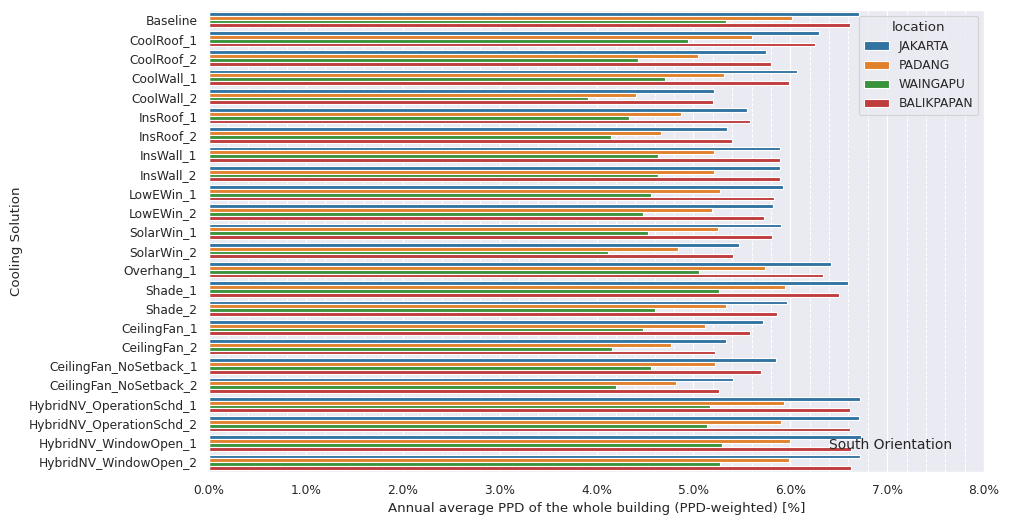

In [30]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['ac_scenario'].isin(['Bedroom_AC_Only']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', x='whole_bldg_avg_ppd_weighted', orient="h", order=cooling_solution_shortlist, 
            hue='location', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
ax1.set_xlim(0, 10)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Annual average PPD of the whole building (PPD-weighted) [%]')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/avg_whole_bldg_ppd_weighted_discomfort_hours.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


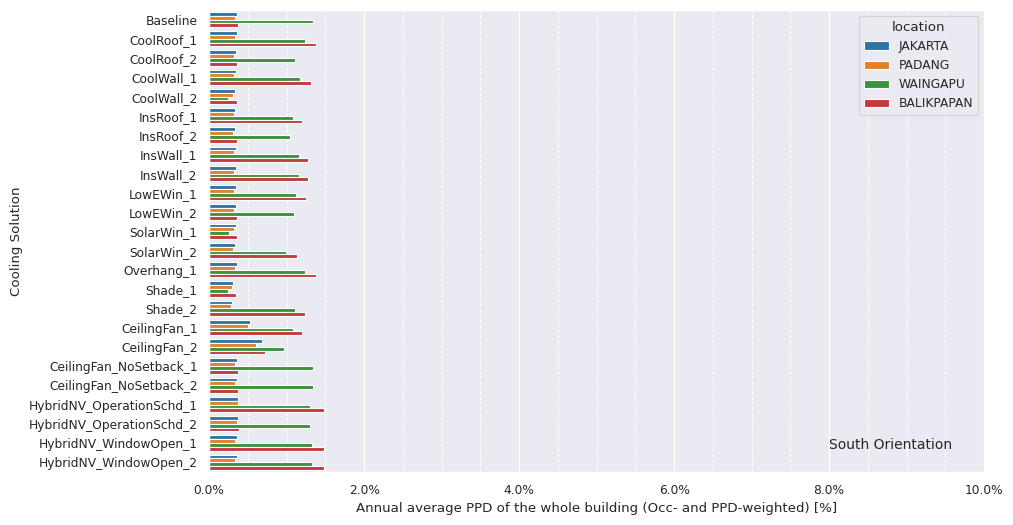

In [32]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['ac_scenario'].isin(['FullHouse_AC']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', x='whole_bldg_avg_occ_ppd_weighted', orient="h", order=cooling_solution_shortlist, 
            hue='location', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
ax1.set_xlim(0, 10)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Annual average PPD of the whole building (Occ- and PPD-weighted) [%]')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/avg_whole_bldg_occ_ppd_weighted_discomfort_hours_fullhouse.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


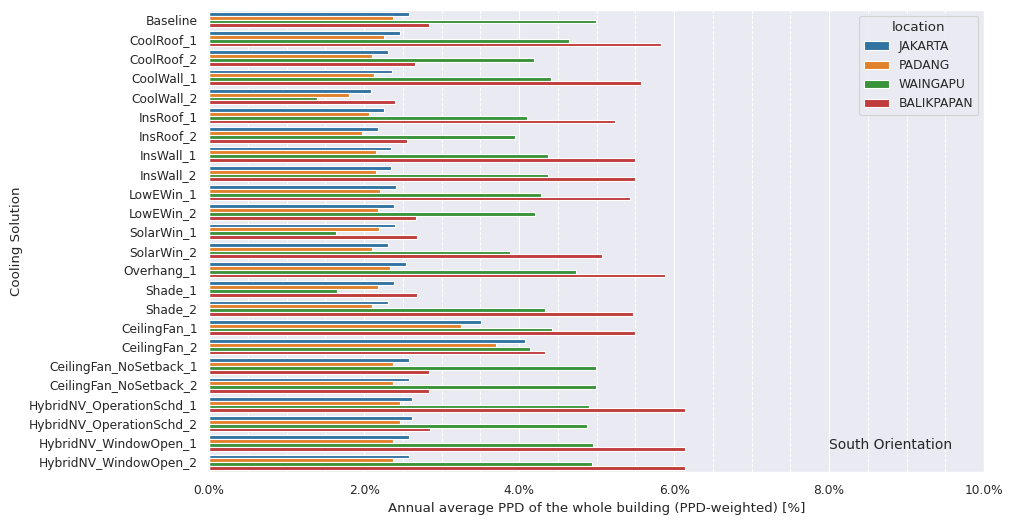

In [33]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['ac_scenario'].isin(['FullHouse_AC']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', x='whole_bldg_avg_ppd_weighted', orient="h", order=cooling_solution_shortlist, 
            hue='location', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
ax1.set_xlim(0, 10)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Annual average PPD of the whole building (PPD-weighted) [%]')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/avg_whole_bldg_ppd_weighted_discomfort_hours_fullhouse.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


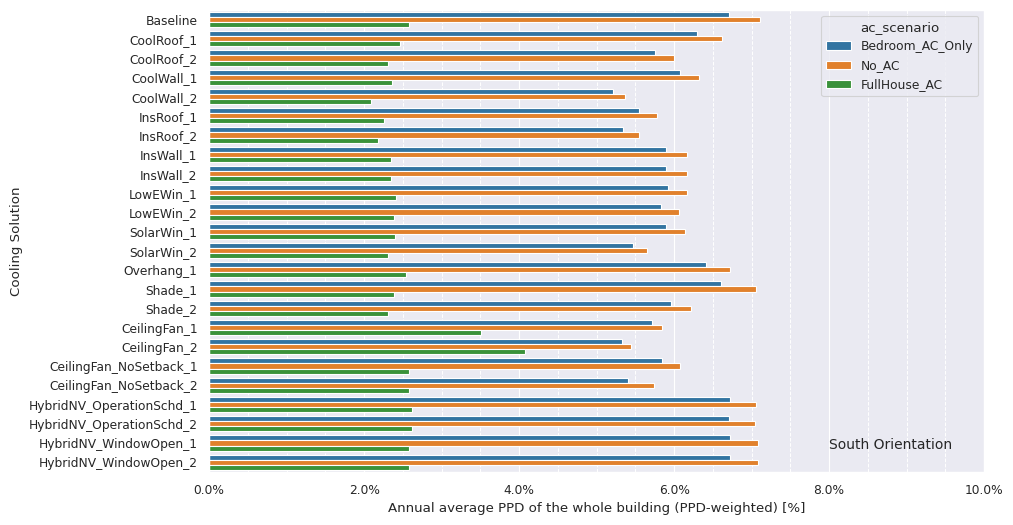

In [36]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['location'].isin(['JAKARTA']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', x='whole_bldg_avg_ppd_weighted', orient="h", order=cooling_solution_shortlist, 
            hue='ac_scenario', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
ax1.set_xlim(0, 10)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Annual average PPD of the whole building (PPD-weighted) [%]')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/avg_whole_bldg_ppd_weighted_discomfort_hours_Jakarta.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


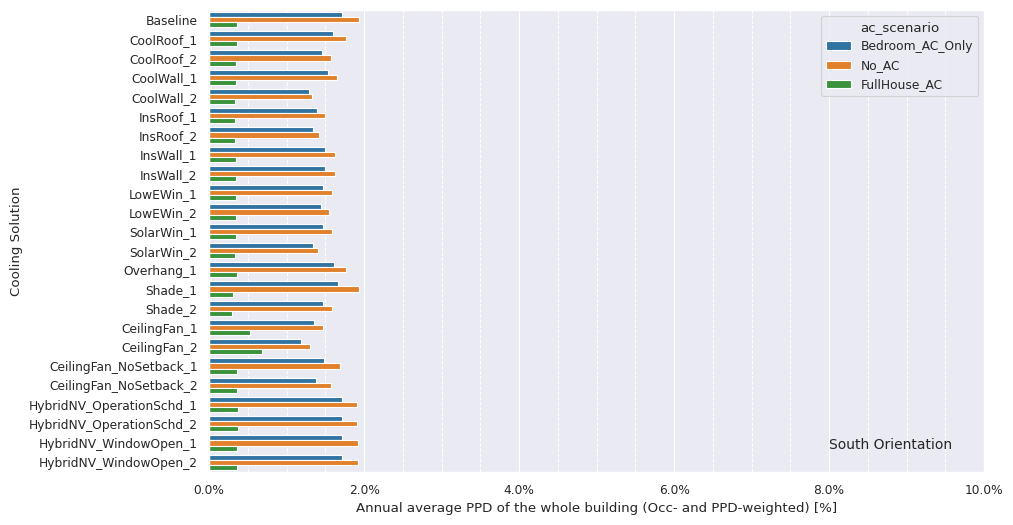

In [37]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['location'].isin(['JAKARTA']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', x='whole_bldg_avg_occ_ppd_weighted', orient="h", order=cooling_solution_shortlist, 
            hue='ac_scenario', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
ax1.set_xlim(0, 10)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Annual average PPD of the whole building (Occ- and PPD-weighted) [%]')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/avg_whole_bldg_occ_ppd_weighted_discomfort_hours_Jakarta.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


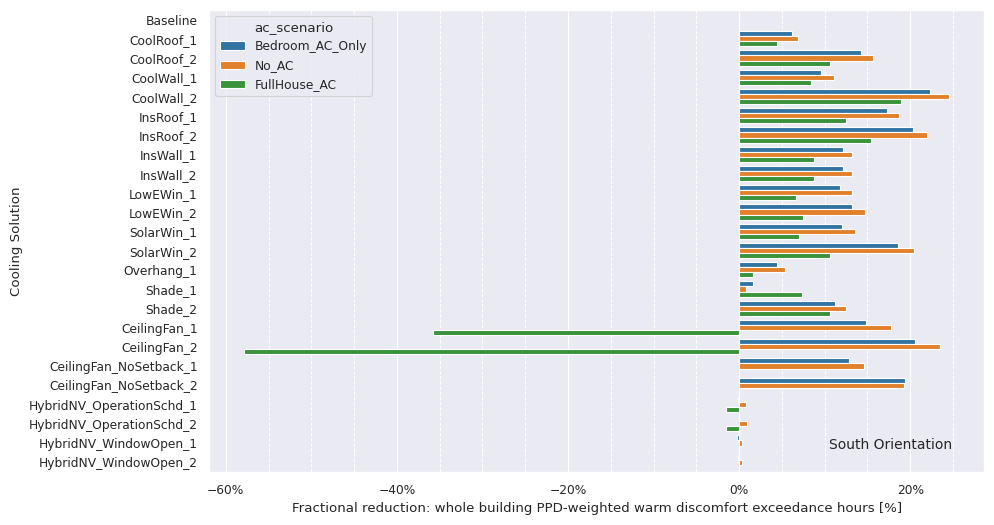

In [54]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['location'].isin(['JAKARTA']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', x='Fractional Reduction: Whole Building: PPD-weighted warm discomfort exceedance hours (%) ', 
            orient="h", order=cooling_solution_shortlist, 
            hue='ac_scenario', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
# ax1.set_xlim(0, 10)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Fractional reduction: whole building PPD-weighted warm discomfort exceedance hours [%]')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/fractional_reduction_whole_bldg_ppd_weighted_discomfort_hours_Jakarta.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


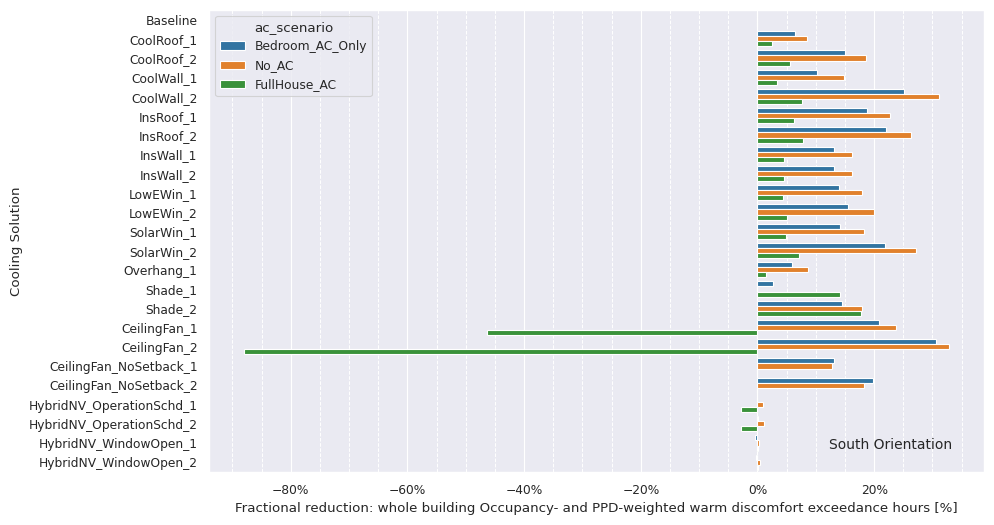

In [55]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['location'].isin(['JAKARTA']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', x='Fractional Reduction: Whole Building: Occupancy- and PPD-weighted warm discomfort exceedance hours (%)', 
            orient="h", order=cooling_solution_shortlist, 
            hue='ac_scenario', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
# ax1.set_xlim(0, 10)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Fractional reduction: whole building Occupancy- and PPD-weighted warm discomfort exceedance hours [%]')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/fractional_reduction_whole_bldg_occ_ppd_weighted_discomfort_hours_Jakarta.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


In [4]:
# Read the csv file - occupancy TSSU weighted
df = pd.read_csv('AllScenarios_Occupancy_TSSU_weighted_warm_discomfort.csv')
df.head()

df.rename(columns={'weather':'location'}, inplace=True)

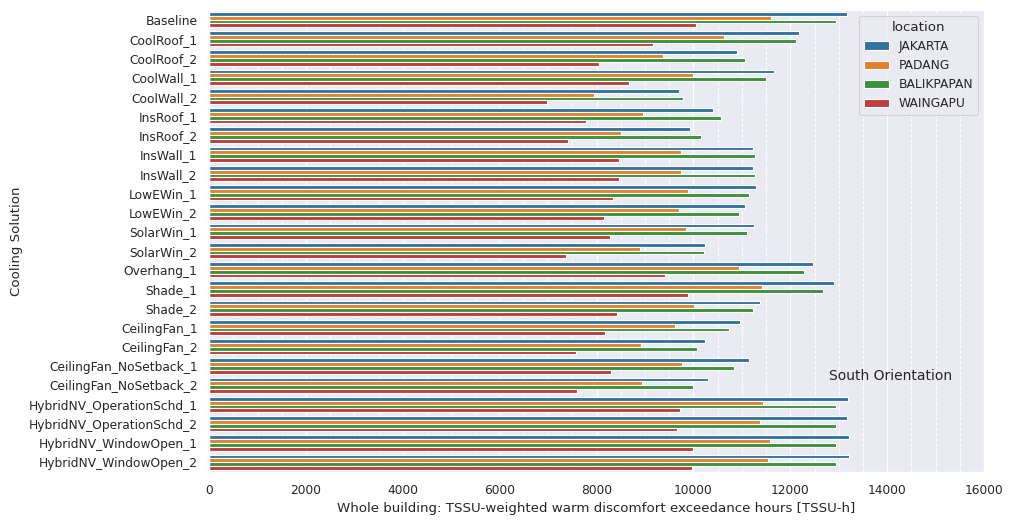

In [10]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['ac_scenario'].isin(['Bedroom_AC_Only']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', x='Whole Building: TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ', orient="h", order=cooling_solution_shortlist, 
            hue='location', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
ax1.set_xlim(0, 16000)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.2), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Whole building: TSSU-weighted warm discomfort exceedance hours [TSSU-h]')
# ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/whole_bldg_tssu_weighted_discomfort_hours.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


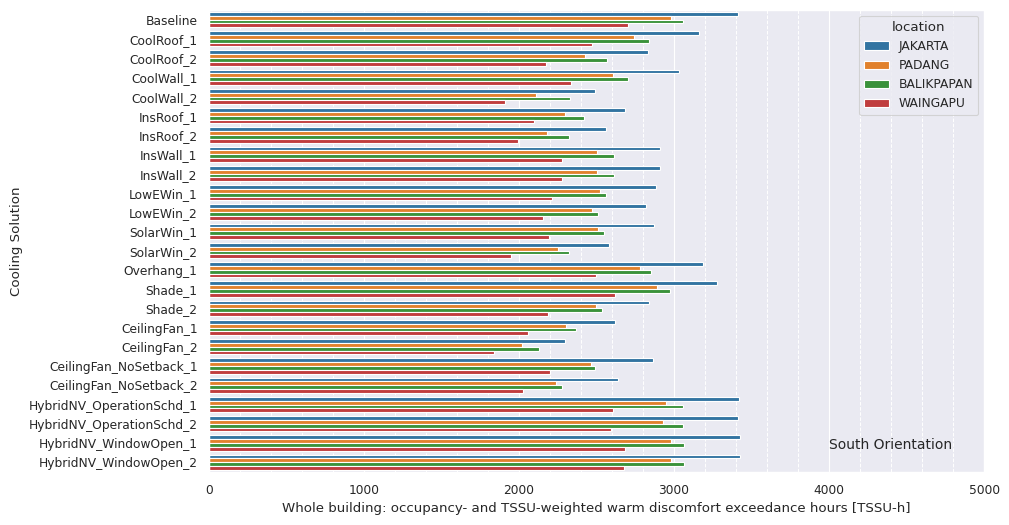

In [15]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['ac_scenario'].isin(['Bedroom_AC_Only']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', 
            x='Whole Building:  occupancy- and TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ', 
            orient="h", order=cooling_solution_shortlist, 
            hue='location', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
ax1.set_xlim(0, 5000)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Whole building: occupancy- and TSSU-weighted warm discomfort exceedance hours [TSSU-h]')
# ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/whole_bldg_occ_tssu_weighted_discomfort_hours.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


In [ ]:
plot_df = df.loc[(df['scenario_name']=='Baseline') & (df['orientation'].isin(['South']))].copy()

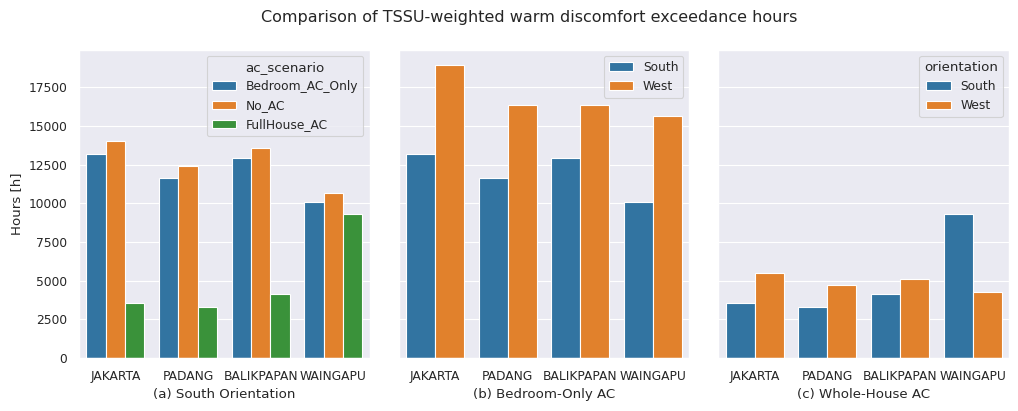

In [23]:
# Create the figure with two subplots: baseline comparsion between locations, group by ac scenarios, group by orientation
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4),facecolor='w', edgecolor='k',
                        sharey=True, sharex=True)
fig.subplots_adjust(hspace=.1, wspace=.1)

fig.suptitle('Comparison of TSSU-weighted warm discomfort exceedance hours')
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['scenario_name']=='Baseline') & (df['orientation'].isin(['South']))].copy()
sns.barplot(data=plot_df, x='location', y='Whole Building: TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ', 
            orient="v", hue='ac_scenario', ax=ax1)

plot_df = df.loc[(df['scenario_name']=='Baseline') & (df['ac_scenario'].isin(['Bedroom_AC_Only']))].copy()
sns.barplot(data=plot_df, x='location', y='Whole Building: TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ', 
            orient="v", hue='orientation', ax=ax2)

plot_df = df.loc[(df['scenario_name']=='Baseline') & (df['ac_scenario'].isin(['FullHouse_AC']))].copy()
sns.barplot(data=plot_df, x='location', y='Whole Building: TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ', 
            orient="v", hue='orientation', ax=ax3)

# Formatting the plot
ax1.set_xlabel('(a) South Orientation')
ax1.set_ylabel('Hours [h]')
# ax1.set_ylim(0, 4000)
# ax1.set_xlabel('Location')

ax2.set_xlabel('(b) Bedroom-Only AC')
ax2.set_ylabel('')
ax2.legend(loc='upper right')
# ax2.set_ylim(0, 4000)
# ax2.set_xlabel('Location')

ax3.set_xlabel('(c) Whole-House AC')
ax3.set_ylabel('')
# ax3.set_ylim(0, 4000)
# ax3.set_xlabel('Location')

# Save the plot into png [shared with others] and svg formats [insert into office documents]
for graph_type in ['png','svg']:
    fig.savefig('plot/annual_tssu_weighted_discomfort_hours.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')

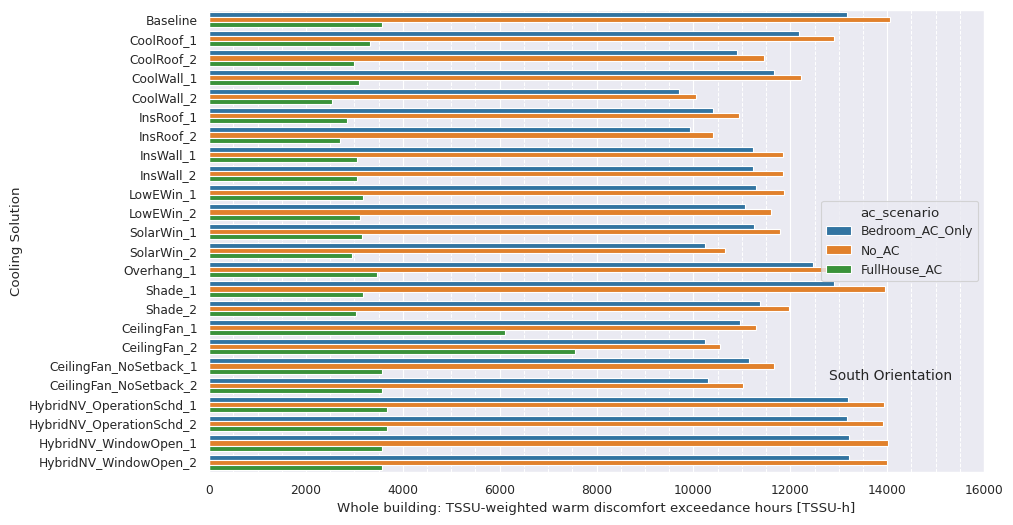

In [26]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['location'].isin(['JAKARTA']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', x='Whole Building: TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ', orient="h", order=cooling_solution_shortlist, 
            hue='ac_scenario', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
ax1.set_xlim(0, 16000)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.2), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Whole building: TSSU-weighted warm discomfort exceedance hours [TSSU-h]')
# ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/whole_bldg_tssu_weighted_discomfort_hours_JAKARTA.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


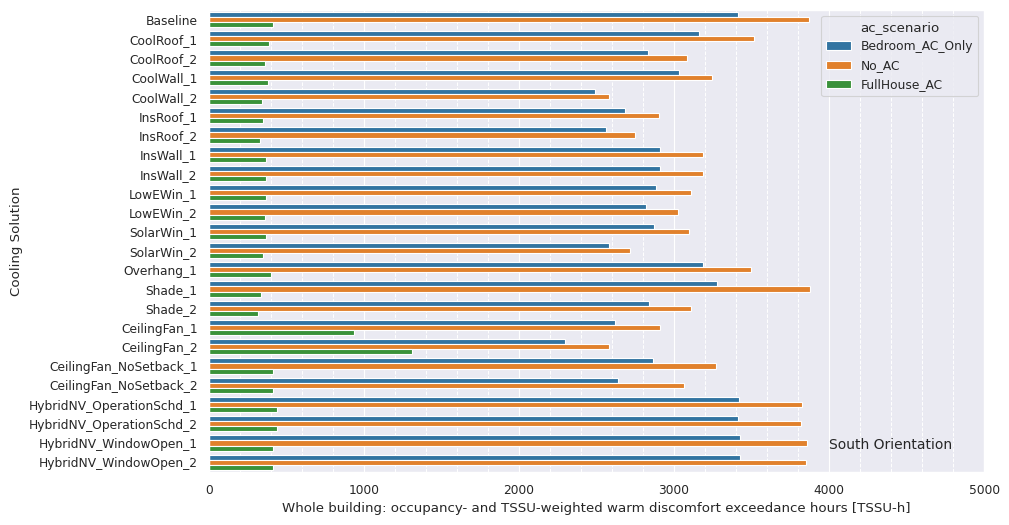

In [28]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['location'].isin(['JAKARTA']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', 
            x='Whole Building:  occupancy- and TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ', 
            orient="h", order=cooling_solution_shortlist, 
            hue='ac_scenario', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
ax1.set_xlim(0, 5000)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Whole building: occupancy- and TSSU-weighted warm discomfort exceedance hours [TSSU-h]')
# ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/whole_bldg_occ_tssu_weighted_discomfort_hours_JAKARTA.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


In [34]:
cooling_solution_shortlist_nobaseline = ['CoolRoof_1', 'CoolRoof_2', 
                         'CoolWall_1', 'CoolWall_2',
                         'InsRoof_1', 'InsRoof_2', 
                         'InsWall_1', 'InsWall_2', 
                         'LowEWin_1', 'LowEWin_2', 
                         'SolarWin_1', 'SolarWin_2',
                         'Overhang_1',
                         'Shade_1', 'Shade_2',
                         'CeilingFan_1','CeilingFan_2', 
                         'CeilingFan_NoSetback_1', 'CeilingFan_NoSetback_2', 
                         'HybridNV_OperationSchd_1', 'HybridNV_OperationSchd_2',
                         'HybridNV_WindowOpen_1', 'HybridNV_WindowOpen_2']

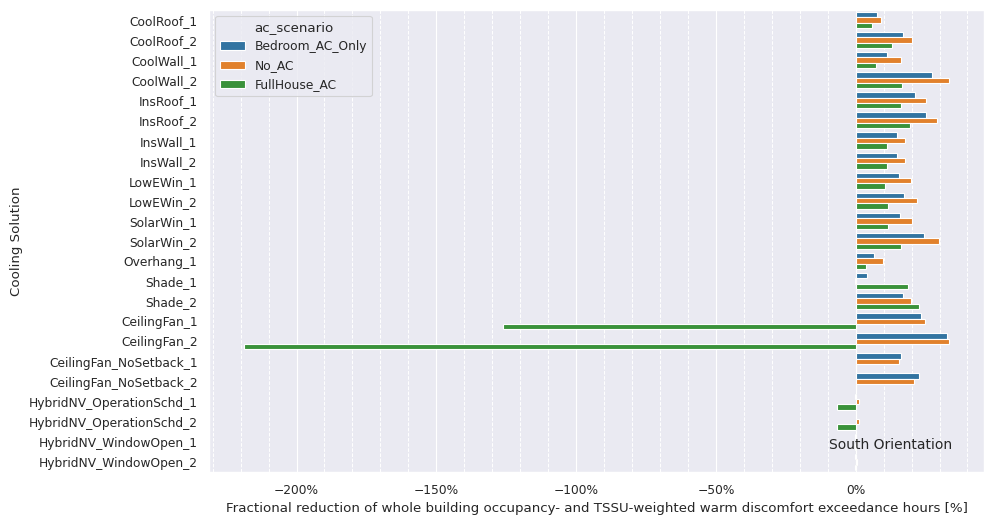

In [35]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['scenario_name'].isin(cooling_solution_shortlist_nobaseline)) & (df['location'].isin(['JAKARTA']))].copy()
plot_df['fraction_occ_tssu'] = plot_df['Fractional Reduction: Whole Building:  occupancy- and TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ']*100
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', 
            x='fraction_occ_tssu', 
            orient="h", order=cooling_solution_shortlist_nobaseline, 
            hue='ac_scenario', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
# ax1.set_xlim(0, 20)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Fractional reduction of whole building occupancy- and TSSU-weighted warm discomfort exceedance hours [%]')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/fractional_reduction_whole_bldg_occ_tssu_weighted_discomfort_hours_JAKARTA.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


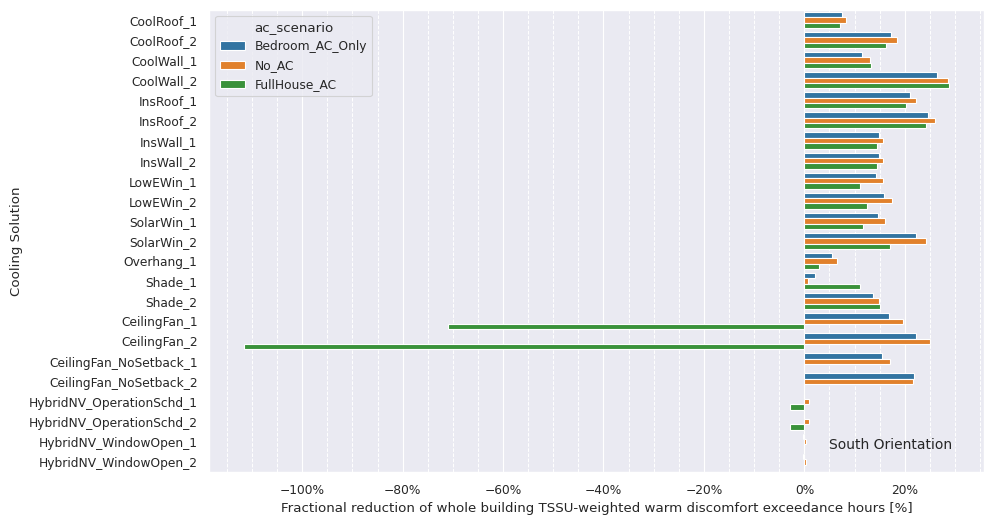

In [36]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['scenario_name'].isin(cooling_solution_shortlist_nobaseline)) & (df['location'].isin(['JAKARTA']))].copy()
plot_df['fraction_tssu'] = plot_df['Fractional Reduction: Whole Building: TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ']*100
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', 
            x='fraction_tssu', 
            orient="h", order=cooling_solution_shortlist_nobaseline, 
            hue='ac_scenario', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
# ax1.set_xlim(0, 20)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Fractional reduction of whole building TSSU-weighted warm discomfort exceedance hours [%]')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/fractional_reduction_whole_bldg_tssu_weighted_discomfort_hours_JAKARTA.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


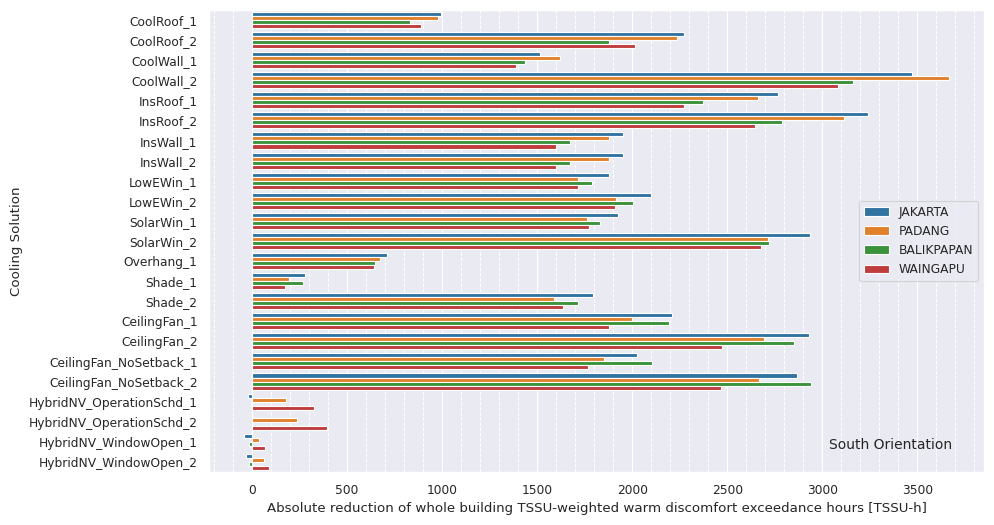

In [38]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['scenario_name'].isin(cooling_solution_shortlist_nobaseline)) & (df['ac_scenario'].isin(['Bedroom_AC_Only']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', x='Reduction: Whole Building: TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ', 
            orient="h", order=cooling_solution_shortlist_nobaseline, 
            hue='location', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
ax1.legend(loc='center right')
# ax1.set_xlim(0, 2)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Absolute reduction of whole building TSSU-weighted warm discomfort exceedance hours [TSSU-h]')
# ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/absolute_reduction_whole_bldg_tssu_weighted_discomfort_hours.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


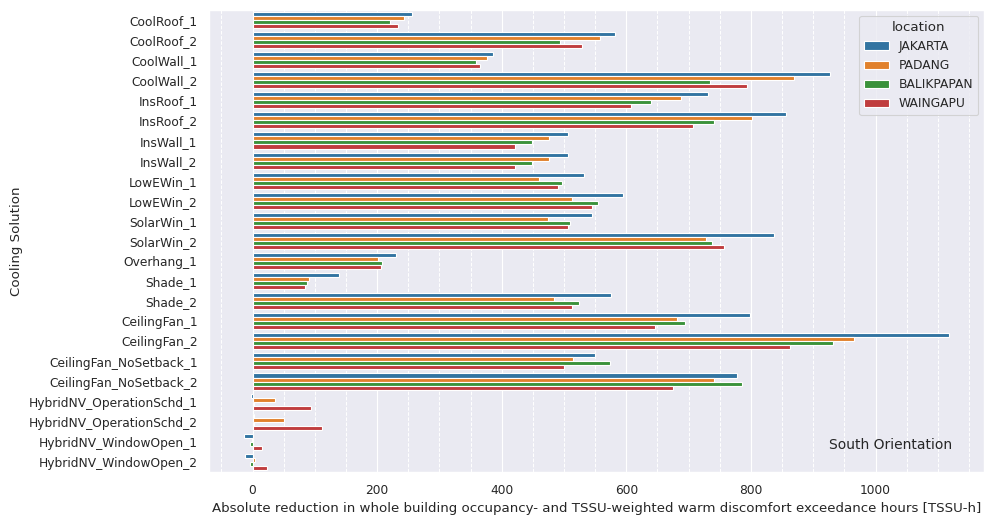

In [39]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['scenario_name'].isin(cooling_solution_shortlist_nobaseline)) & (df['ac_scenario'].isin(['Bedroom_AC_Only']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', x='Reduction: Whole Building:  occupancy- and TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ', 
            orient="h", order=cooling_solution_shortlist_nobaseline, 
            hue='location', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
# ax1.set_xlim(0, 2)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Absolute reduction in whole building occupancy- and TSSU-weighted warm discomfort exceedance hours [TSSU-h]')
# ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/absolute_reduction_whole_bldg_occ_tssu_weighted_discomfort_hours.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


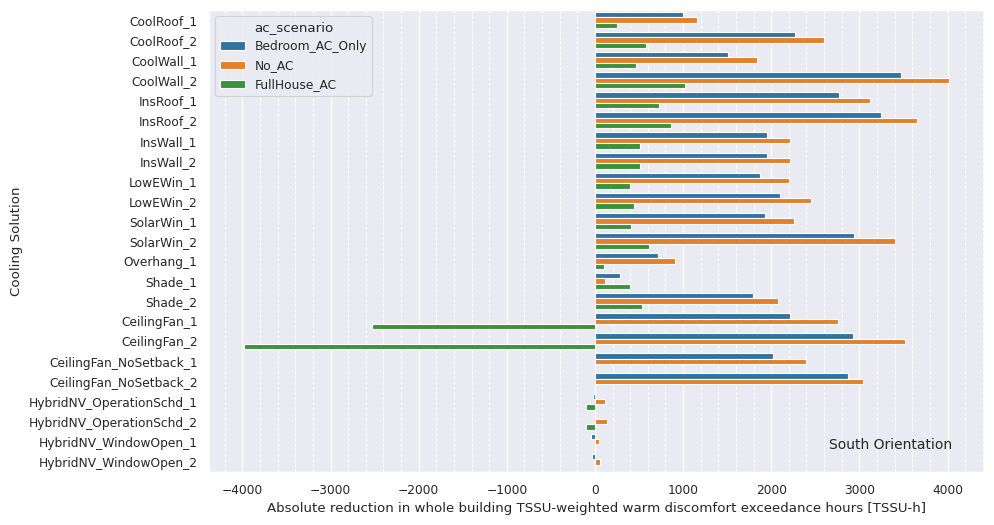

In [40]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['scenario_name'].isin(cooling_solution_shortlist_nobaseline)) & (df['location'].isin(['JAKARTA']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', x='Reduction: Whole Building: TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ', 
            orient="h", order=cooling_solution_shortlist_nobaseline, 
            hue='ac_scenario', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
# ax1.set_xlim(0, 2)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Absolute reduction in whole building TSSU-weighted warm discomfort exceedance hours [TSSU-h]')
# ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/absolute_reduction_whole_bldg_tssu_weighted_discomfort_hours_JAKARTA.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


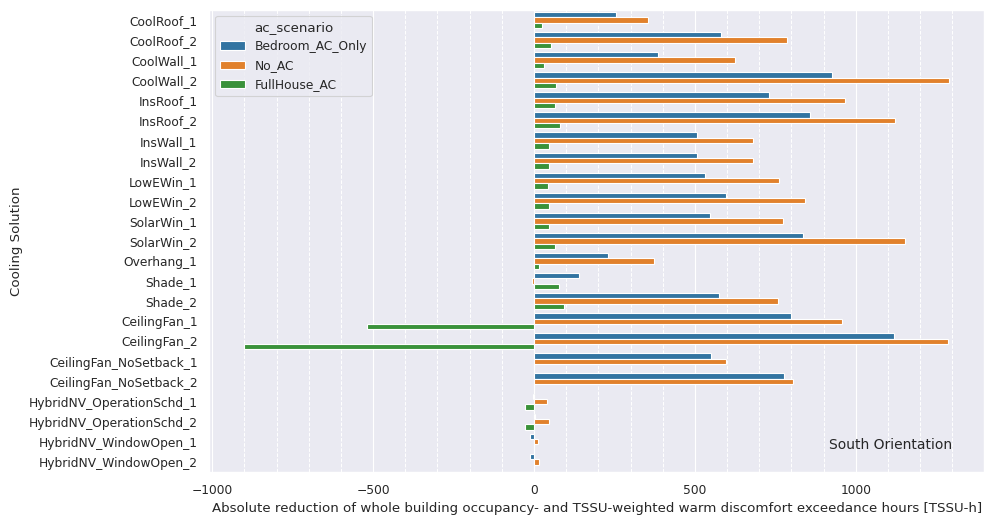

In [41]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['scenario_name'].isin(cooling_solution_shortlist_nobaseline)) & (df['location'].isin(['JAKARTA']))].copy()
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', x='Reduction: Whole Building:  occupancy- and TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ', 
            orient="h", order=cooling_solution_shortlist_nobaseline, 
            hue='ac_scenario', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
# ax1.set_xlim(0, 2)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Absolute reduction of whole building occupancy- and TSSU-weighted warm discomfort exceedance hours [TSSU-h]')
# ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/absolute_reduction_whole_bldg_occ_tssu_weighted_discomfort_hours_JAKARTA.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


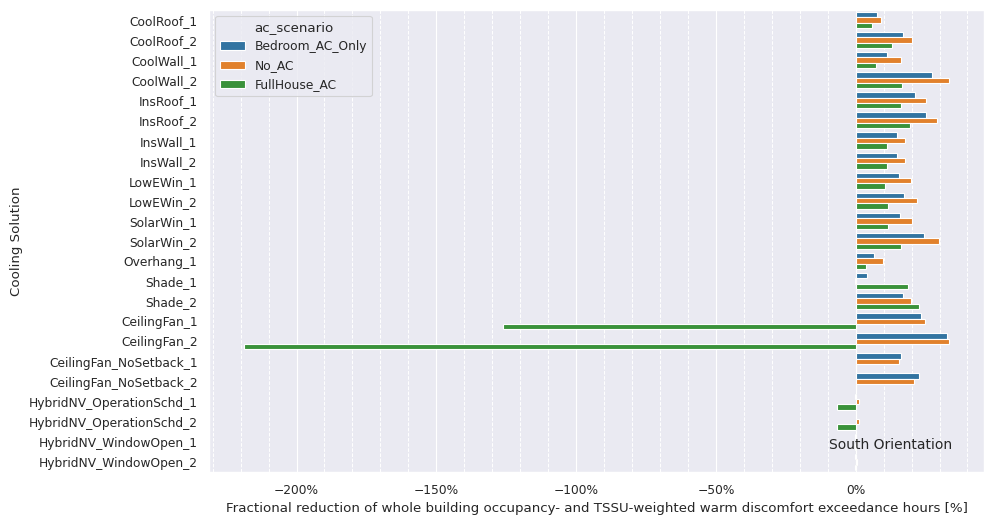

In [42]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['scenario_name'].isin(cooling_solution_shortlist_nobaseline)) & (df['location'].isin(['JAKARTA']))].copy()
plot_df['fraction_occ_tssu'] = plot_df['Fractional Reduction: Whole Building:  occupancy- and TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ']*100
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', 
            x='fraction_occ_tssu', 
            orient="h", order=cooling_solution_shortlist_nobaseline, 
            hue='ac_scenario', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
# ax1.set_xlim(0, 20)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Fractional reduction of whole building occupancy- and TSSU-weighted warm discomfort exceedance hours [%]')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/fractional_reduction_whole_bldg_occ_tssu_weighted_discomfort_hours_JAKARTA.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


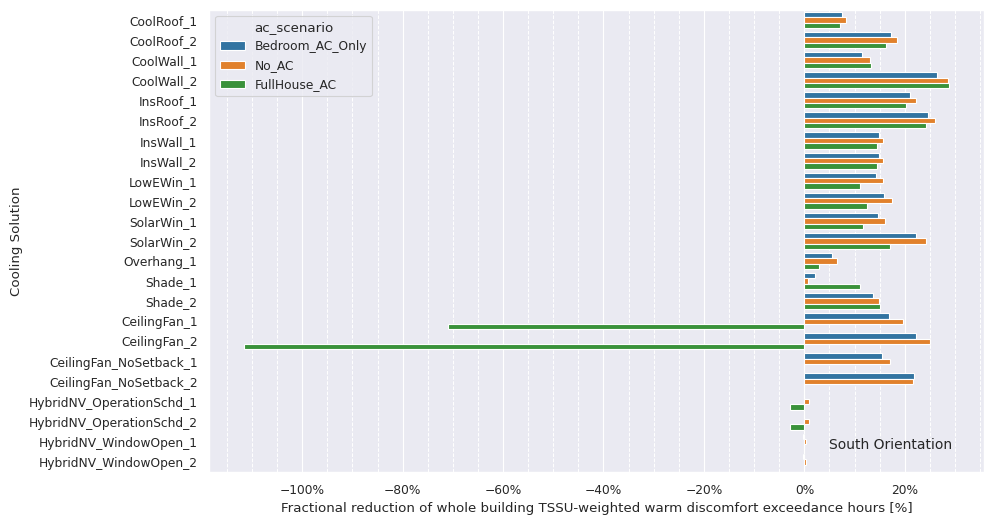

In [43]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['scenario_name'].isin(cooling_solution_shortlist_nobaseline)) & (df['location'].isin(['JAKARTA']))].copy()
plot_df['fraction_tssu'] = plot_df['Fractional Reduction: Whole Building: TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ']*100
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', 
            x='fraction_tssu', 
            orient="h", order=cooling_solution_shortlist_nobaseline, 
            hue='ac_scenario', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
# ax1.set_xlim(0, 20)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Fractional reduction of whole building TSSU-weighted warm discomfort exceedance hours [%]')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for graph_type in ['png','svg']:
    fig.savefig('plot/fractional_reduction_whole_bldg_tssu_weighted_discomfort_hours_JAKARTA.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


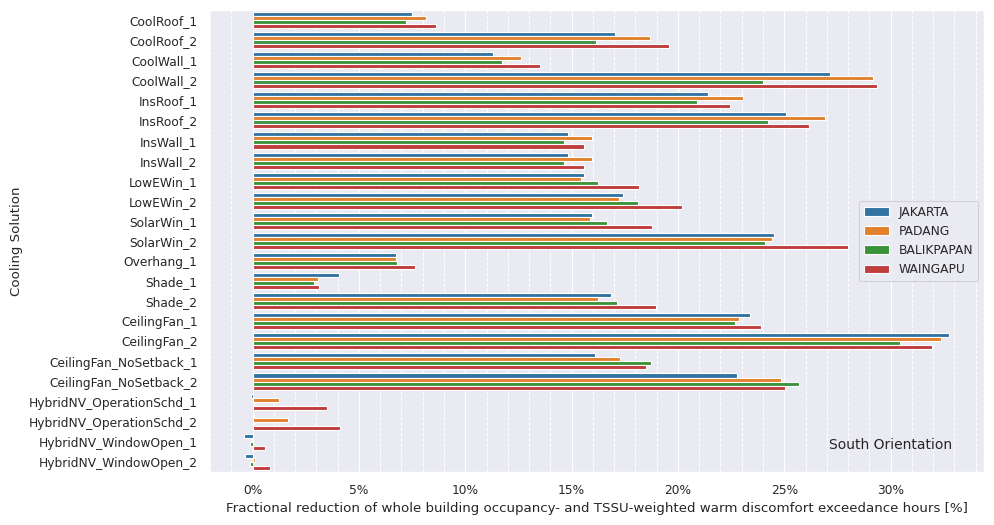

In [45]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['scenario_name'].isin(cooling_solution_shortlist_nobaseline)) & (df['ac_scenario'].isin(['Bedroom_AC_Only']))].copy()
plot_df['fraction_occ_tssu'] = plot_df['Fractional Reduction: Whole Building:  occupancy- and TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ']*100
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', 
            x='fraction_occ_tssu', 
            orient="h", order=cooling_solution_shortlist_nobaseline, 
            hue='location', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
ax1.legend(loc='center right')
# ax1.set_xlim(0, 40)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Fractional reduction of whole building occupancy- and TSSU-weighted warm discomfort exceedance hours [%]')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

for graph_type in ['png','svg']:
    fig.savefig('plot/fractional_reduction_whole_bldg_occ_tssu_weighted_discomfort_hours.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


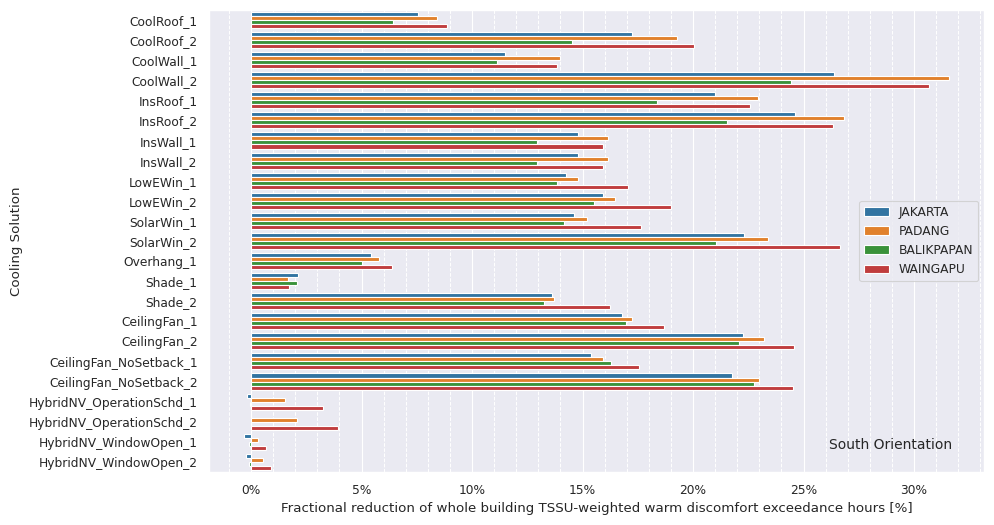

In [46]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['orientation']=='South') & (df['scenario_name'].isin(cooling_solution_shortlist_nobaseline)) & (df['ac_scenario'].isin(['Bedroom_AC_Only']))].copy()
plot_df['fraction_tssu'] = plot_df['Fractional Reduction: Whole Building: TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ']*100
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', 
            x='fraction_tssu', 
            orient="h", order=cooling_solution_shortlist_nobaseline, 
            hue='location', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
ax1.legend(loc='center right')
# ax1.set_xlim(0, 40)
# Add annotations at the lower right corner of plot
ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Fractional reduction of whole building TSSU-weighted warm discomfort exceedance hours [%]')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

for graph_type in ['png','svg']:
    fig.savefig('plot/fractional_reduction_whole_bldg_tssu_weighted_discomfort_hours.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


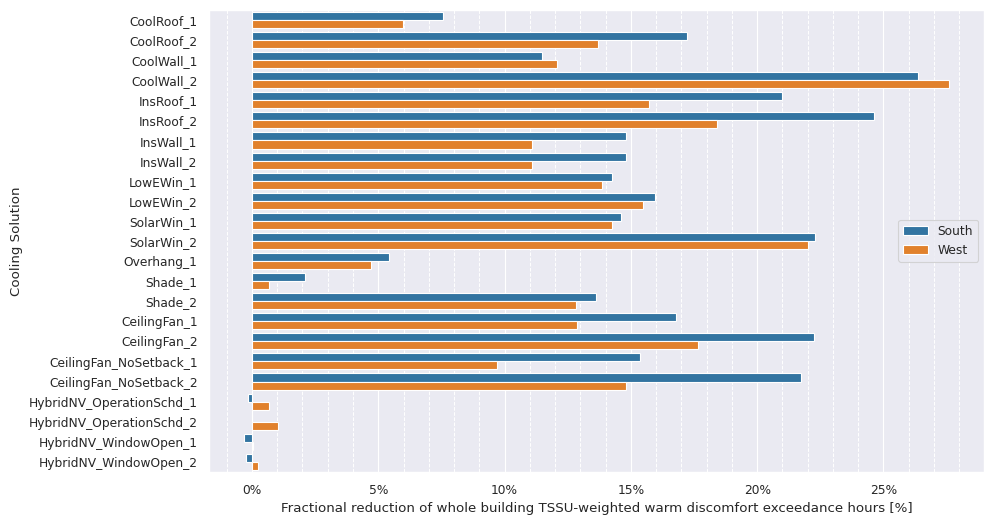

In [48]:
# Create a subset of the dataframe for plotting
plot_df = df.loc[(df['location']=='JAKARTA') & (df['scenario_name'].isin(cooling_solution_shortlist_nobaseline)) & (df['ac_scenario'].isin(['Bedroom_AC_Only']))].copy()
plot_df['fraction_tssu'] = plot_df['Fractional Reduction: Whole Building: TSSU-weighted warm discomfort exceedance hours [TSSU-h]: ']*100
# Set the sns style
sns.set_style('darkgrid')
sns.set_context('paper')

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6),facecolor='w', edgecolor='k',
                        sharey=False, sharex=False)
fig.subplots_adjust(hspace=.1, wspace=.1)
sns.barplot(data=plot_df, y='scenario_name', 
            x='fraction_tssu', 
            orient="h", order=cooling_solution_shortlist_nobaseline, 
            hue='orientation', ax=ax1)

# Add x-axis minor gridlines
# Add minor ticks without labels; necessary for minor grid
ax1.xaxis.set_minor_locator(mtick.AutoMinorLocator())

# Show the minor grid lines
ax1.grid(which='minor', axis='x', linestyle='--', linewidth=0.7)
ax1.set_ylabel('Cooling Solution')
ax1.legend(loc='center right')
# ax1.set_xlim(0, 40)
# Add annotations at the lower right corner of plot
# ax1.annotate('South Orientation', xy=(0.8, 0.05), xycoords='axes fraction', fontsize=10,)
ax1.set_xlabel('Fractional reduction of whole building TSSU-weighted warm discomfort exceedance hours [%]')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

for graph_type in ['png','svg']:
    fig.savefig('plot/fractional_reduction_whole_bldg_tssu_weighted_discomfort_hours_Jakarta_orientation.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')


In [92]:
pmv_shortlist = ['scenario_name', 'Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)',
                 'PEOPLE BEDROOM 1:Zone Thermal Comfort Fanger Model PMV [](Hourly)', 
                 'PEOPLE BEDROOM 2:Zone Thermal Comfort Fanger Model PMV [](Hourly)',
                 'PEOPLE KITCHEN:Zone Thermal Comfort Fanger Model PMV [](Hourly)', 
                 'PEOPLE LIVINGROOM:Zone Thermal Comfort Fanger Model PMV [](Hourly)']
zone_pmv_list = ['PEOPLE BEDROOM 1:Zone Thermal Comfort Fanger Model PMV [](Hourly)', 
                 'PEOPLE BEDROOM 2:Zone Thermal Comfort Fanger Model PMV [](Hourly)',
                 'PEOPLE KITCHEN:Zone Thermal Comfort Fanger Model PMV [](Hourly)', 
                 'PEOPLE LIVINGROOM:Zone Thermal Comfort Fanger Model PMV [](Hourly)']
# Create a subset of the dataframe for plotting
df1 = pd.read_csv('../output_files/Jakarta/init_49.csv')
df2 = pd.read_csv('../output_files/Jakarta/init_62.csv')
df3 = pd.read_csv('../output_files/Jakarta/init_63.csv')

df1['scenario_name'] = 'Baseline'
df2['scenario_name'] = 'CeilingFan_1'
df3['scenario_name'] = 'CeilingFan_2'

pmv_df = pd.concat([df1, df2, df3])
plot_df = pmv_df[[col for col in pmv_df.columns if col in pmv_shortlist]].copy()
plot_df.rename(columns={'Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)': 'Outdoor Temperature [C]', 
                        'scenario_name': 'case_name'}, inplace=True)


In [74]:
plot_df.scenario_name.unique()

array(['Baseline', 'CeilingFan_1', 'CeilingFan_2'], dtype=object)

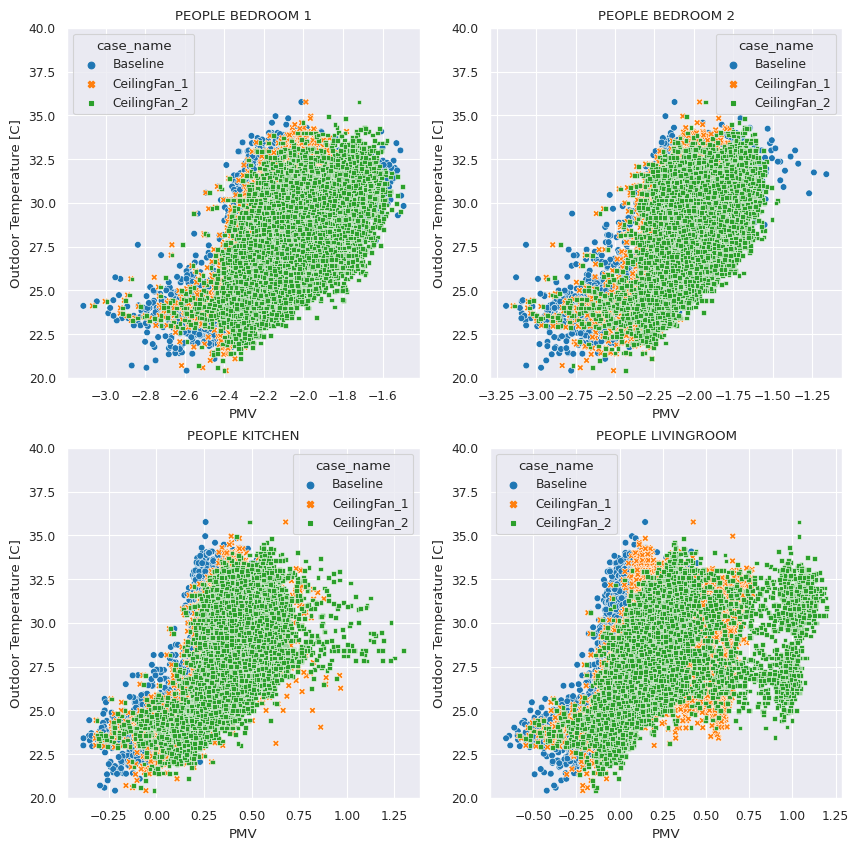

In [93]:
# Melt the dataframe
# melted_df = pmv_df.melt(id_vars=['scenario_name','Outdoor Temperature [C]'], value_vars=zone_pmv_list, var_name='zone', 
#                         value_name='pmv')

# Create the scatter plot with two subplots
fig, (axs) = plt.subplots(2, 2, figsize=(10, 10))

# Subplot for zone 1
sns.scatterplot(data=plot_df[(plot_df['case_name'].isin(['Baseline','CeilingFan_1','CeilingFan_2']))], 
                y='Outdoor Temperature [C]', x=zone_pmv_list[0], 
                hue='case_name', style="case_name", ax=axs[0, 0])
axs[0, 0].set_title('{}'.format(zone_pmv_list[0].split(':')[0]))
axs[0, 0].set_xlabel('PMV')
axs[0, 0].set_ylim(20, 40)
axs[0, 0].set_ylabel('Outdoor Temperature [C]')

# Subplot for zone 2
sns.scatterplot(data=plot_df[(plot_df['case_name'].isin(['Baseline','CeilingFan_1','CeilingFan_2']))], 
                y='Outdoor Temperature [C]', x=zone_pmv_list[1], 
                hue='case_name', style="case_name", ax=axs[0, 1])
axs[0, 1].set_title('{}'.format(zone_pmv_list[1].split(':')[0]))
axs[0, 1].set_xlabel('PMV')
axs[0, 1].set_ylim(20, 40)
axs[0, 1].set_ylabel('Outdoor Temperature [C]')

# Subplot for zone 1
sns.scatterplot(data=plot_df[(plot_df['case_name'].isin(['Baseline','CeilingFan_1','CeilingFan_2']))], 
                y='Outdoor Temperature [C]', x=zone_pmv_list[2], 
                hue='case_name', style="case_name", ax=axs[1, 0])
axs[1, 0].set_title('{}'.format(zone_pmv_list[2].split(':')[0]))
axs[1, 0].set_xlabel('PMV')
axs[1, 0].set_ylim(20, 40)
axs[1, 0].set_ylabel('Outdoor Temperature [C]')

# Subplot for zone 2
sns.scatterplot(data=plot_df[(plot_df['case_name'].isin(['Baseline','CeilingFan_1','CeilingFan_2']))], 
                y='Outdoor Temperature [C]', x=zone_pmv_list[3], 
                hue='case_name', style="case_name", ax=axs[1, 1])
axs[1, 1].set_title('{}'.format(zone_pmv_list[3].split(':')[0]))
axs[1, 1].set_xlabel('PMV')
axs[1, 1].set_ylim(20, 40)
axs[1, 1].set_ylabel('Outdoor Temperature [C]')

# Show the plot
for graph_type in ['png','svg']:
    fig.savefig('plot/scatter_zone_pmv_Jakarta_south_fullac_closingfactor.{}'.format(graph_type), 
                dpi=600, format=graph_type, bbox_inches='tight')

In [ ]:
# Debug the HVAC savings between the baseline and the natural ventilation case for a full ac house
